## Task3: Parsing sentences into diagrams <br>
Displaying different parsing methods

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [2]:
import numpy as np

BATCH_SIZE = 30
EPOCHS = 120
SEED = 2

In [3]:
def read_data(filename):
    labels, sentences1, sentences2 = [], [], []
    with open(filename) as f:
        for line in f:
            split_list = line.split(",")
            t = int(split_list[2])
            labels.append(t)
            sentences1.append(split_list[0])
            sentences2.append(split_list[1])
    return labels, sentences1, sentences2

all_labels, all_sentences1, all_sentences2 = read_data('MC1.TXT')
all_data = list(zip(all_sentences1[0:80], all_sentences2[0:80]))
print(all_data[0])
train_labels, train_data1, train_data2 = all_labels[0: 80], all_sentences1[0: 80], all_sentences2[0: 80]
test_labels, test_data1, test_data2 = all_labels[80: 100], all_sentences1[80: 100], all_sentences2[80: 100]
train_data =  list(zip(train_data1, train_data2))
test_data =  list(zip(test_data1, test_data2))

('cook creates complicated dish', ' experienced chef prepares complicated dish')


## Allowing only s roots

In [4]:
from lambeq import BobcatParser

parser = BobcatParser(verbose='text', root_cats=['S[dcl]', 'S[wq]', 'S[q]', 'S[qem]'])

raw_train_sentences1_diagrams = parser.sentences2diagrams(train_data1)

Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.


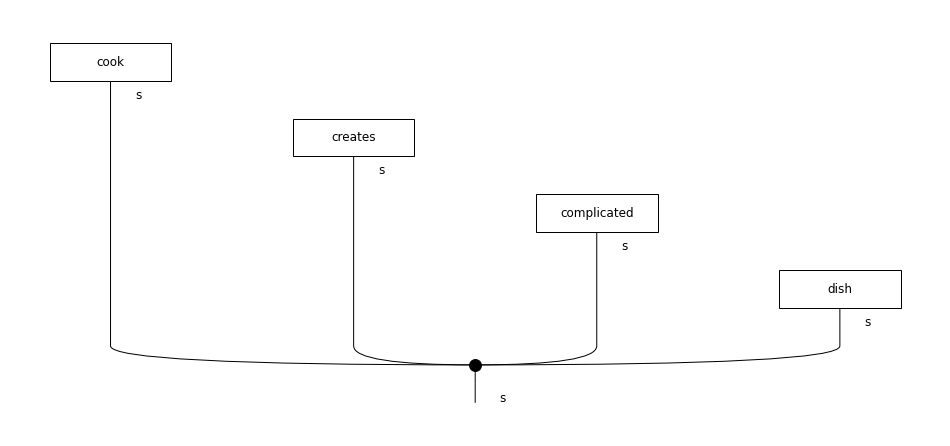

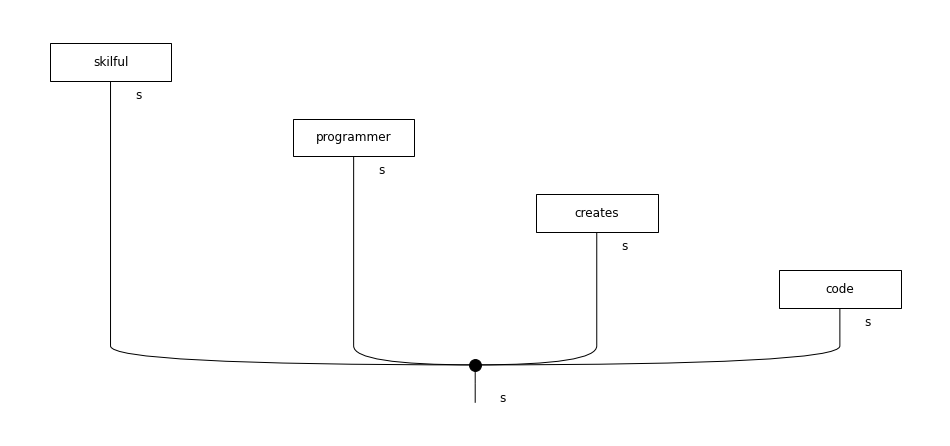

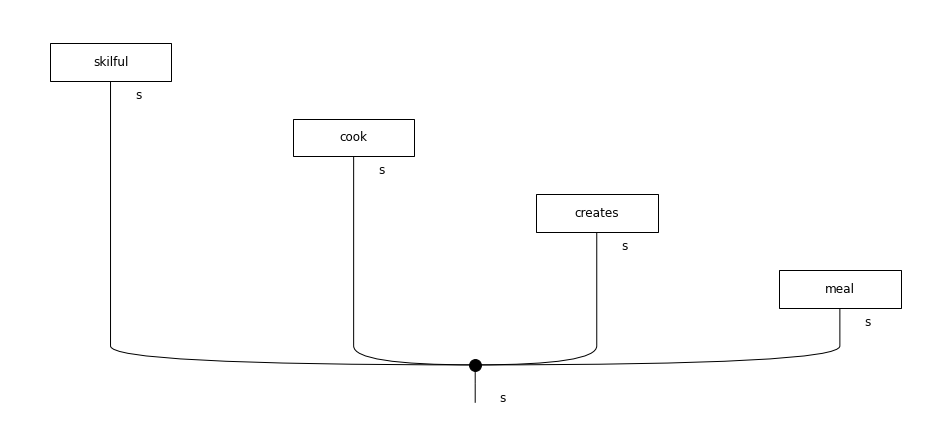

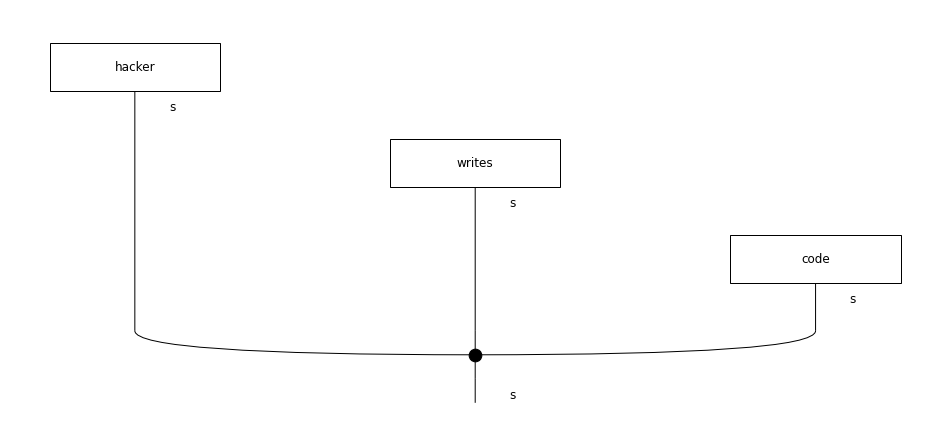

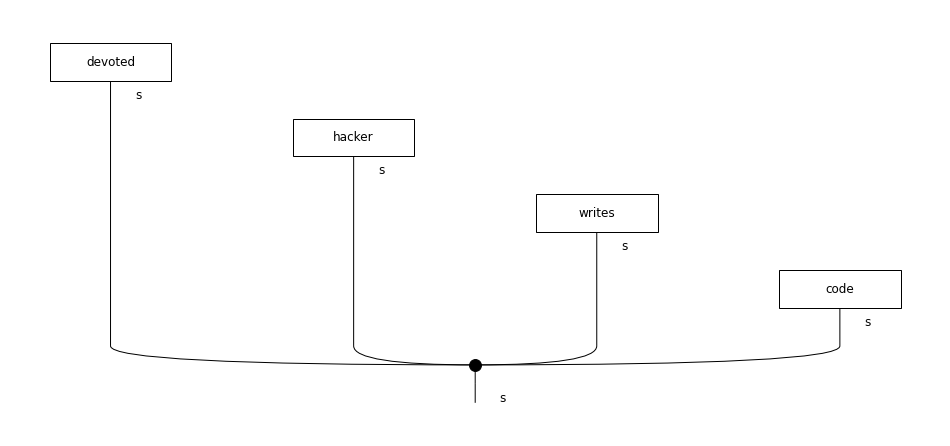

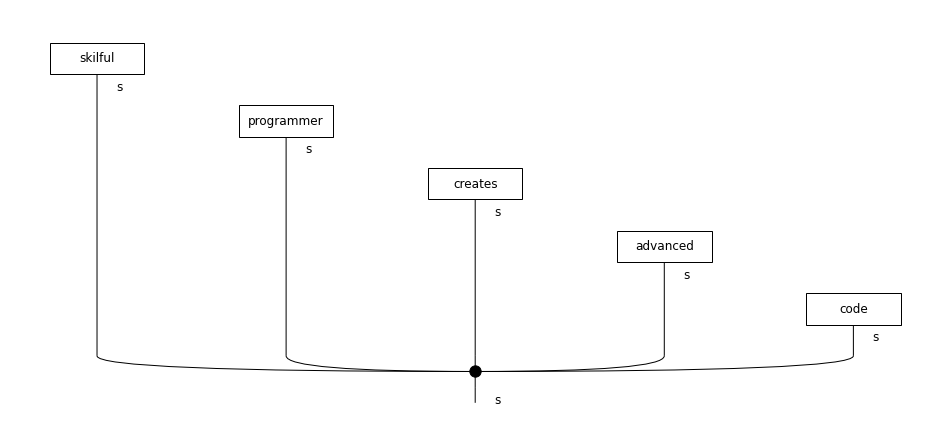

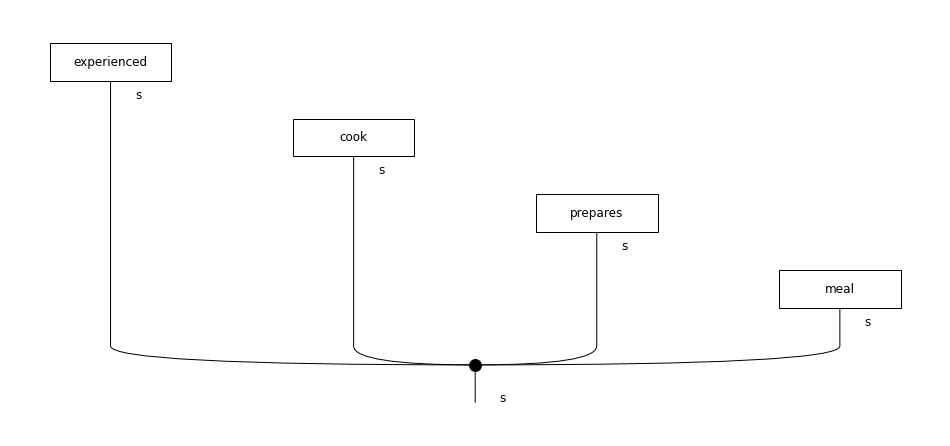

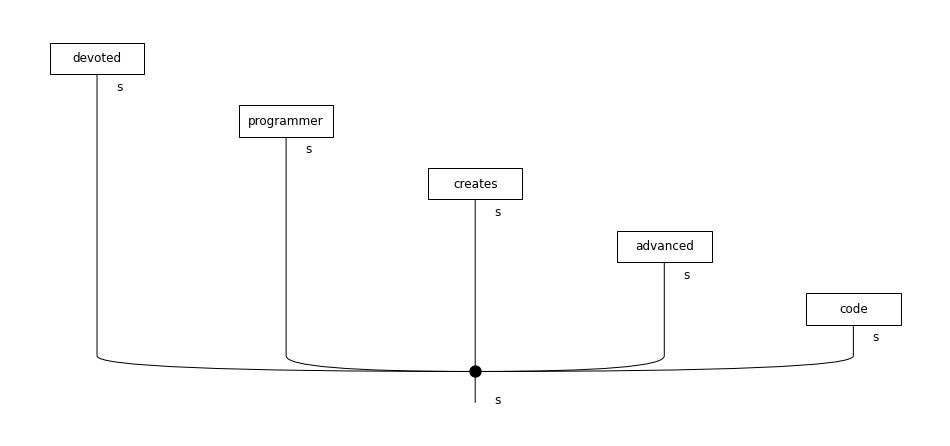

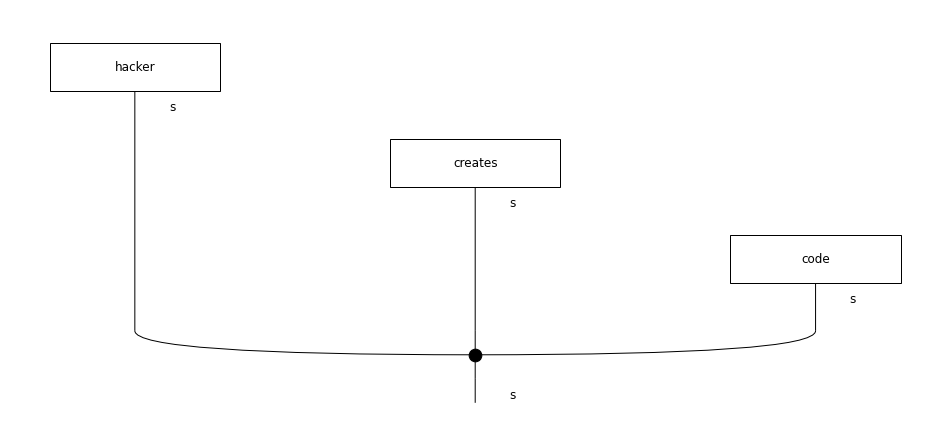

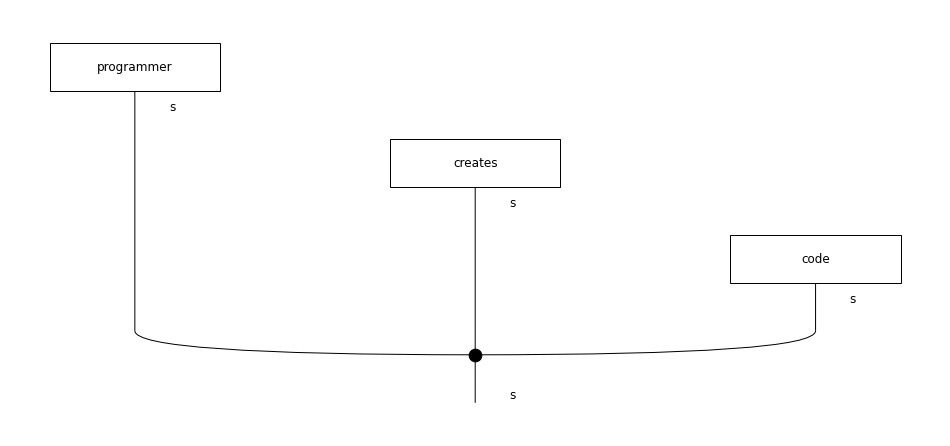

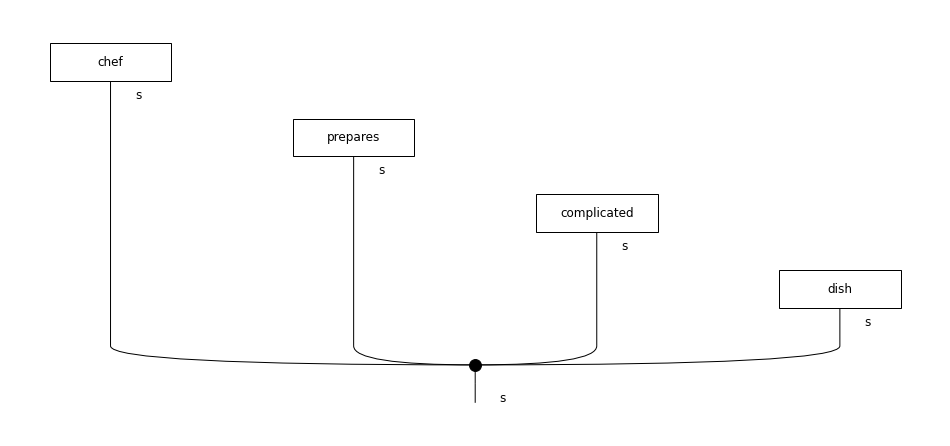

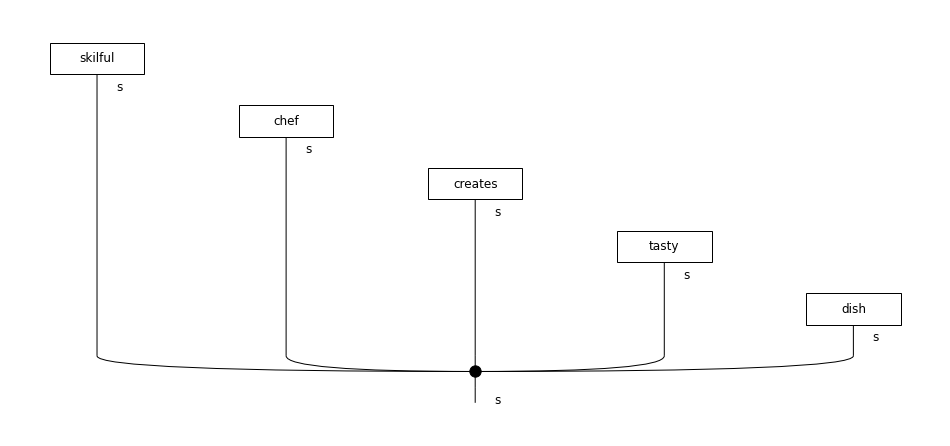

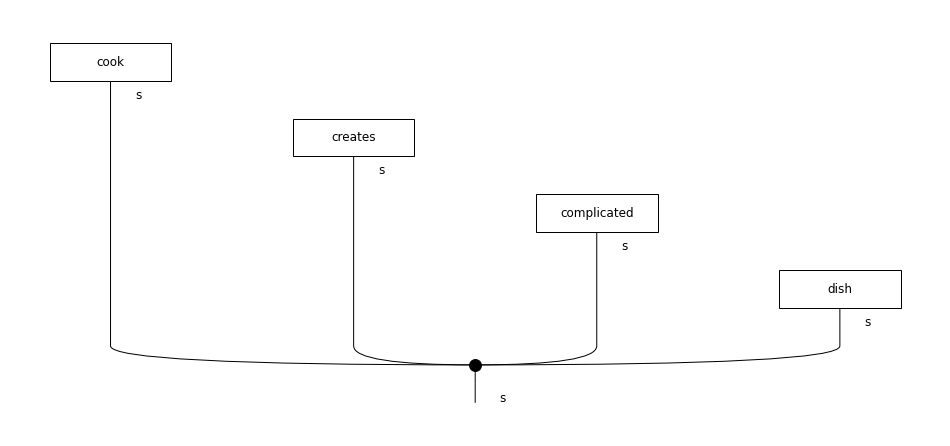

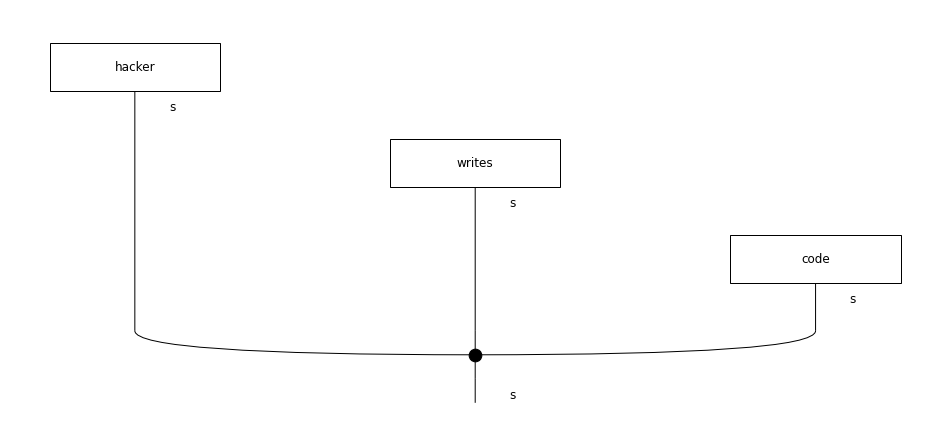

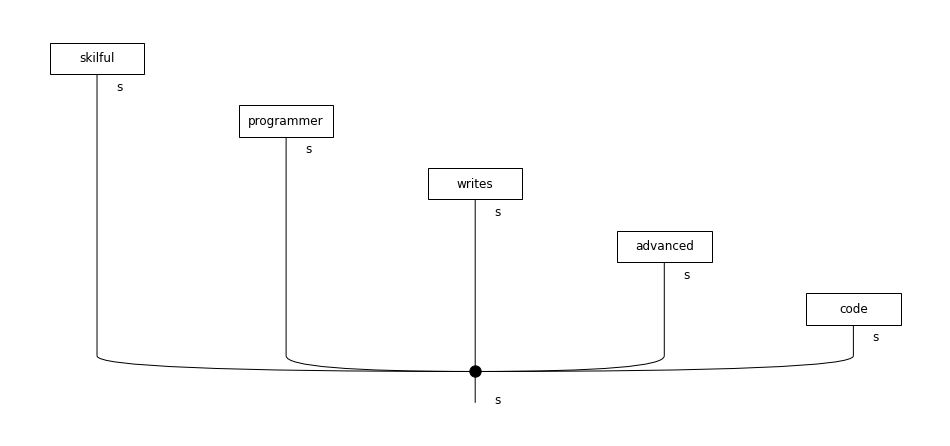

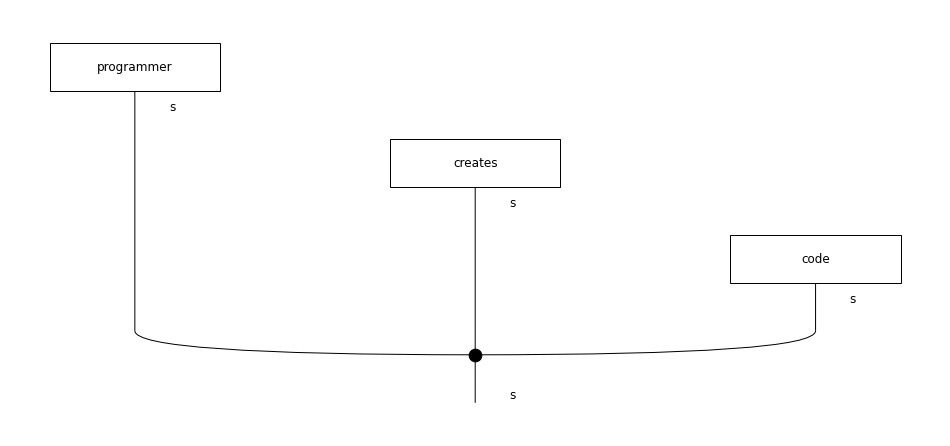

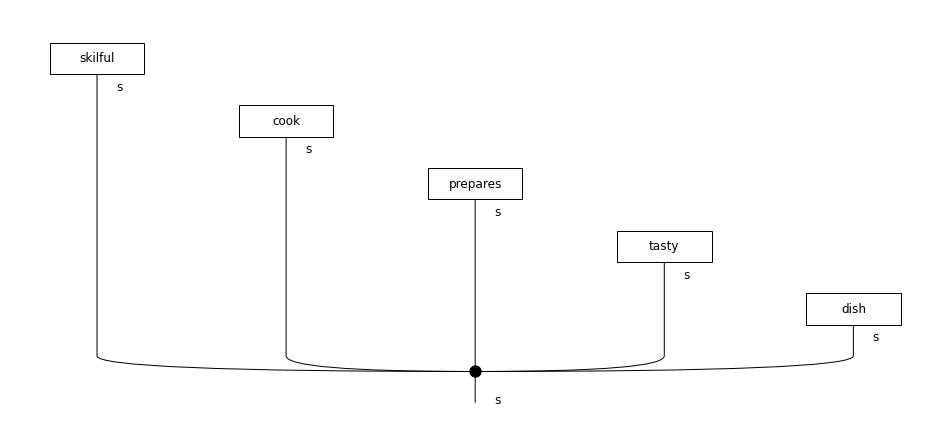

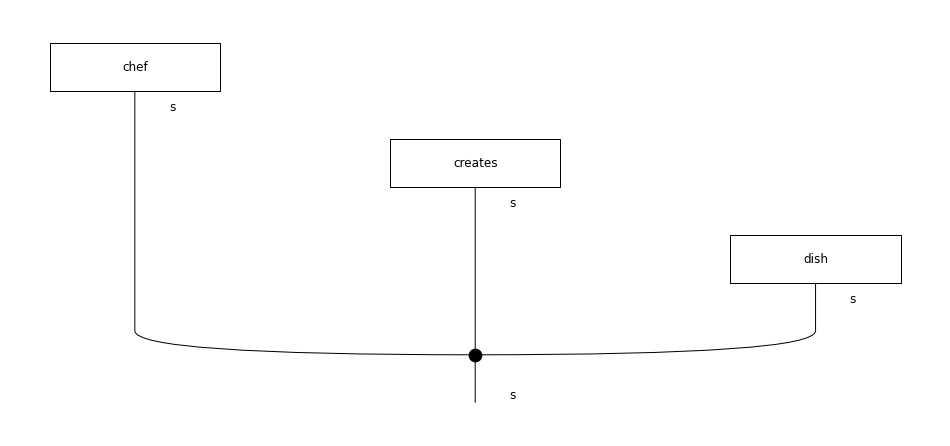

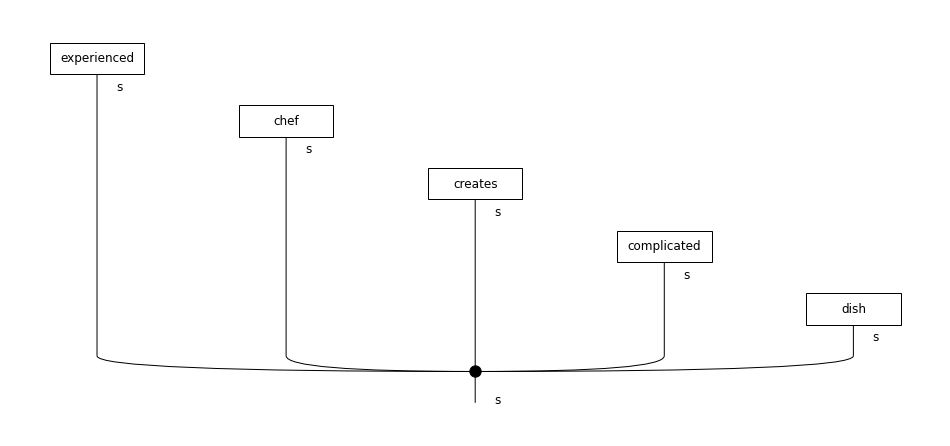

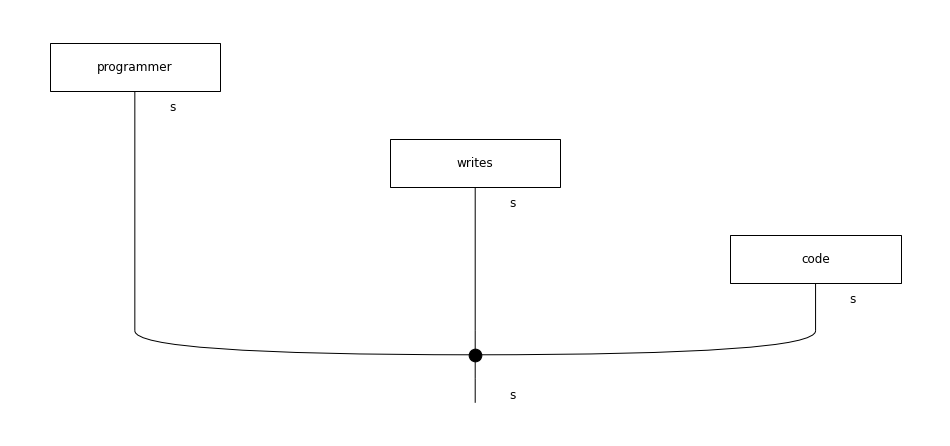

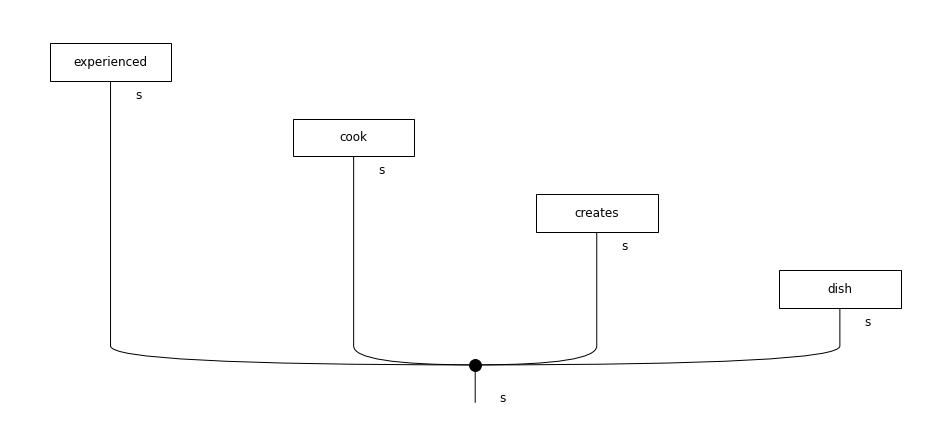

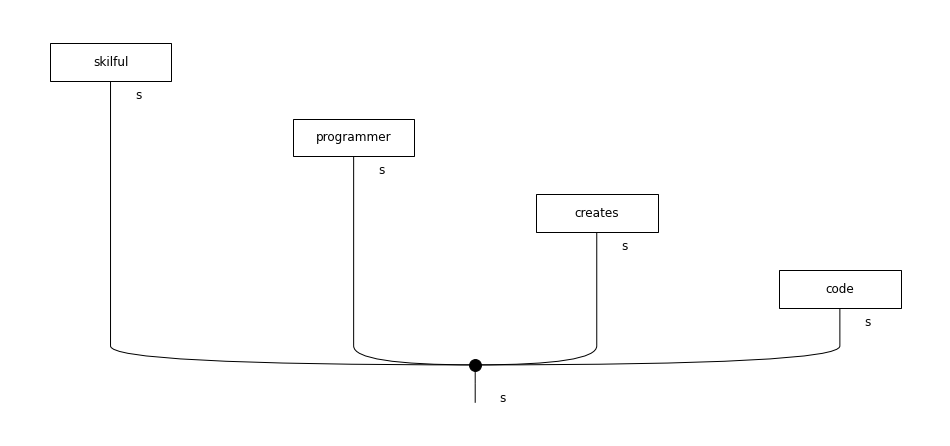

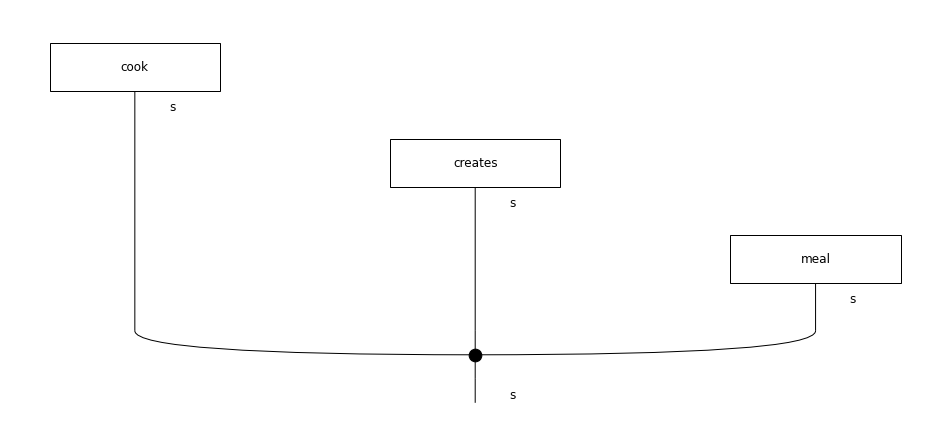

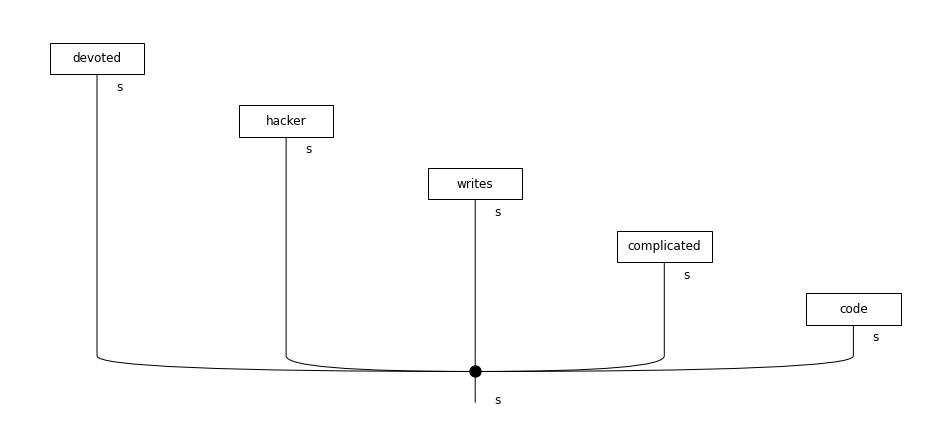

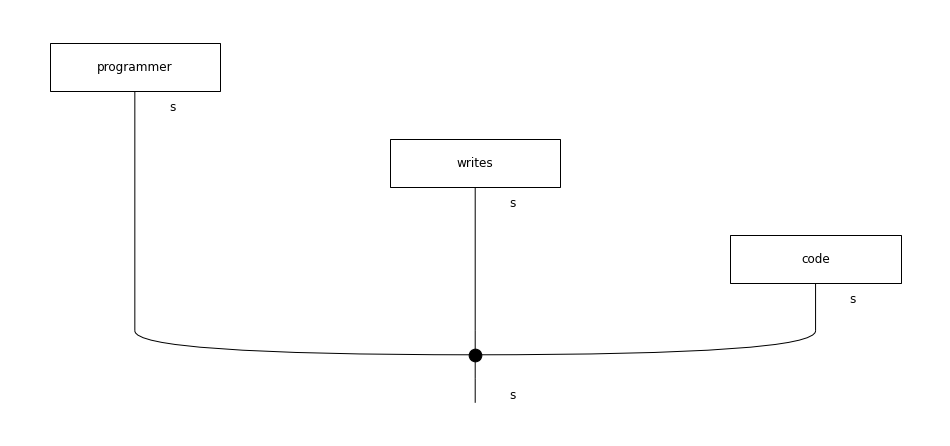

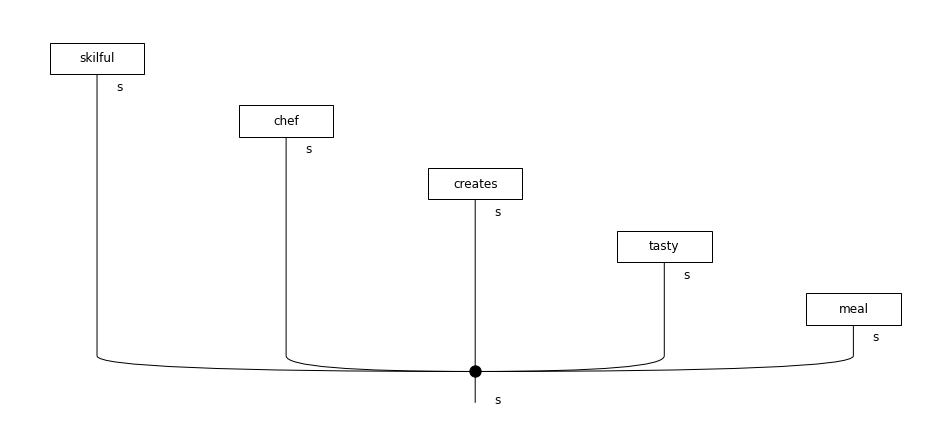

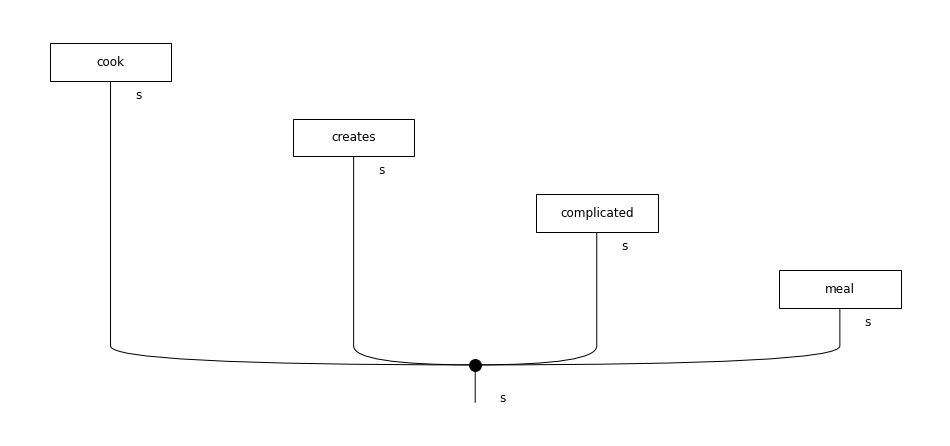

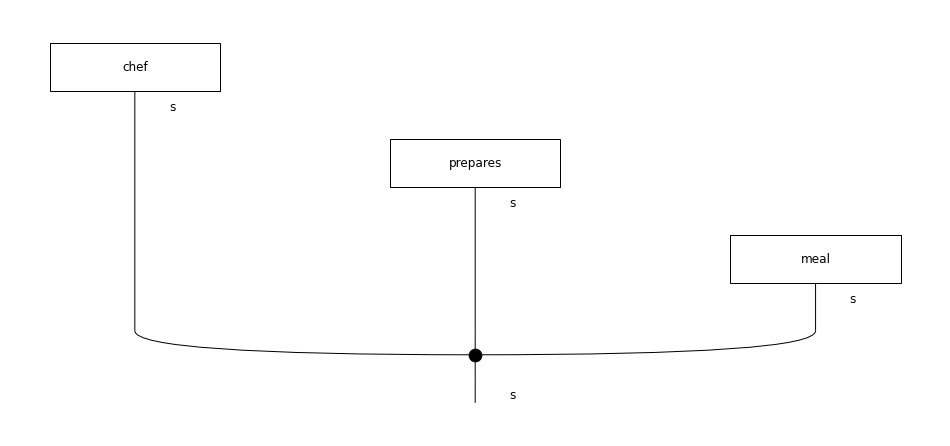

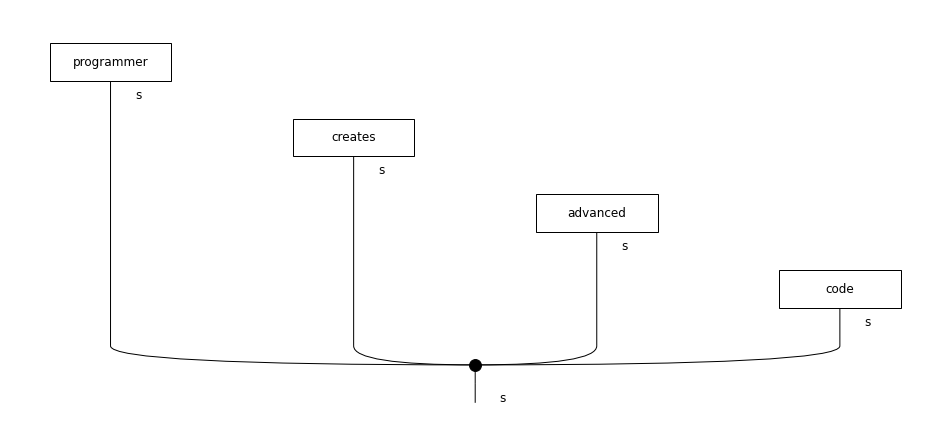

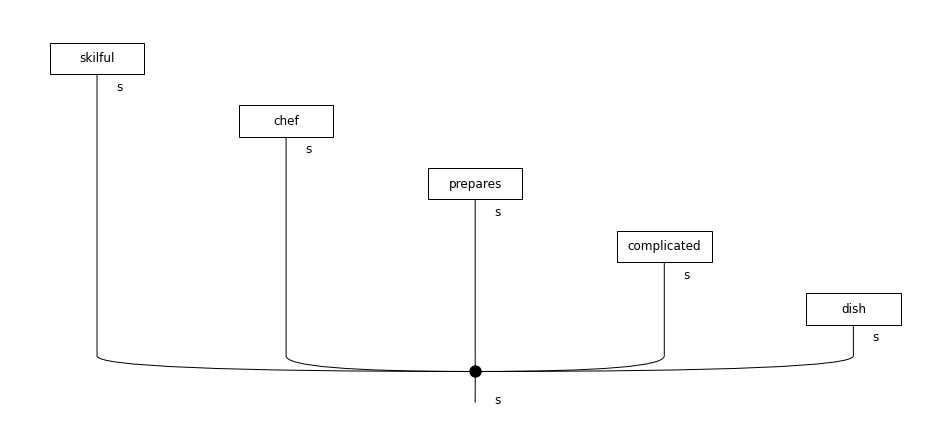

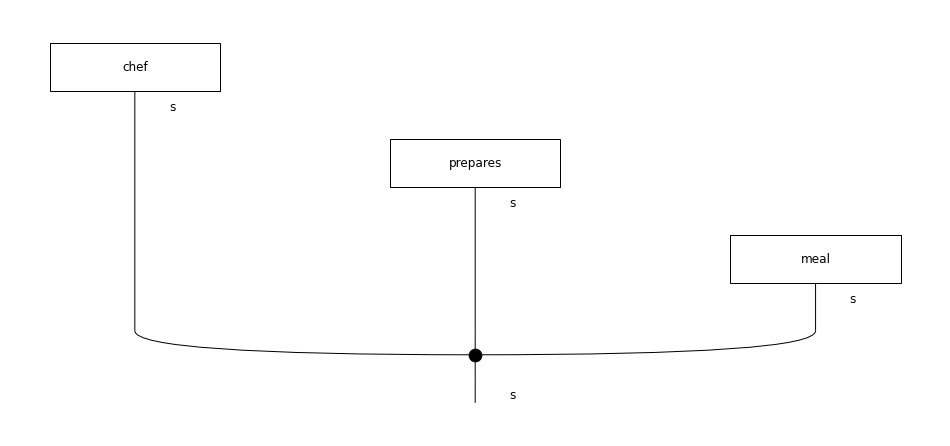

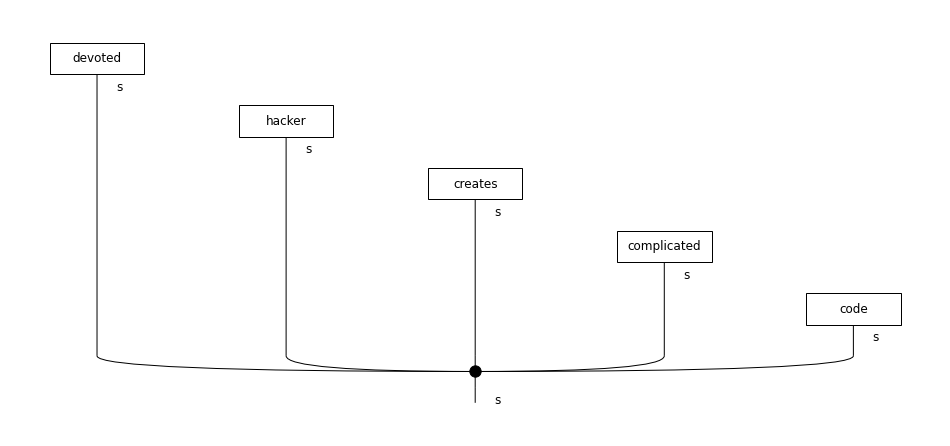

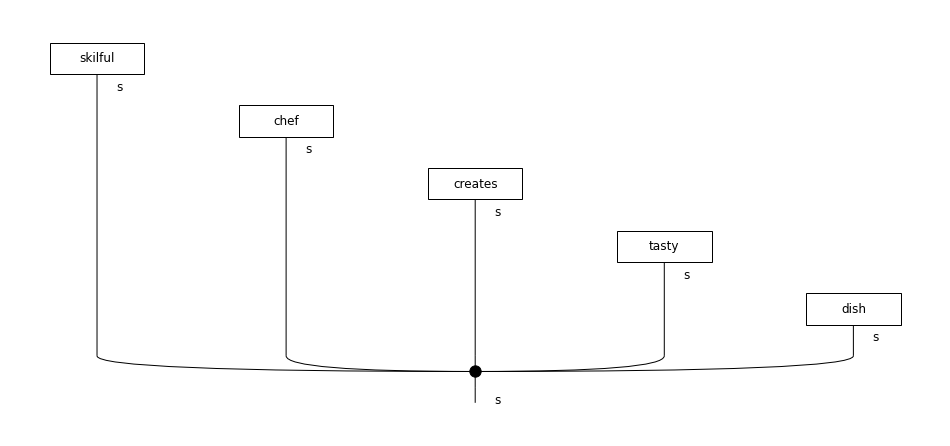

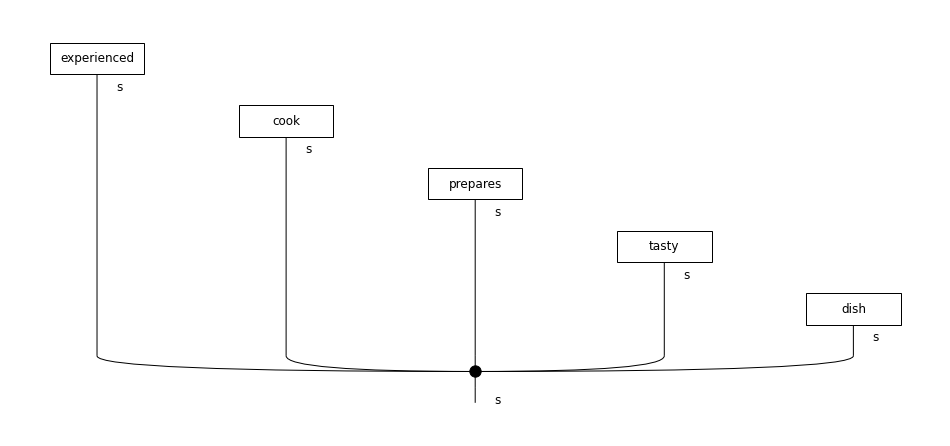

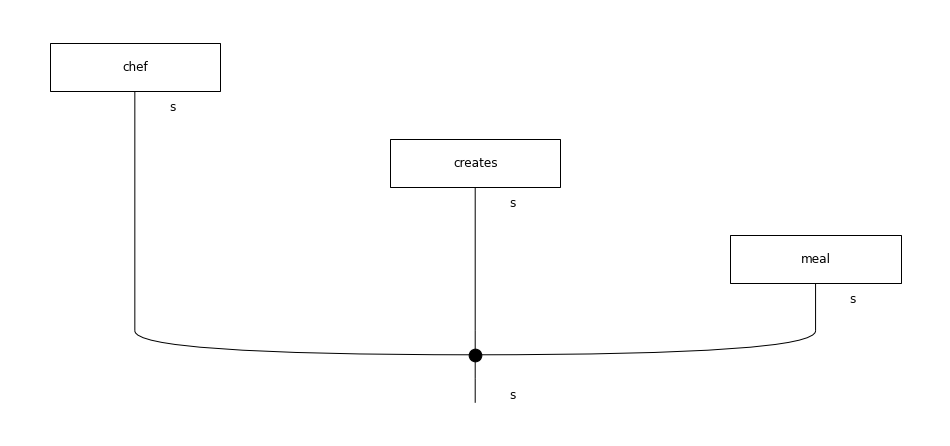

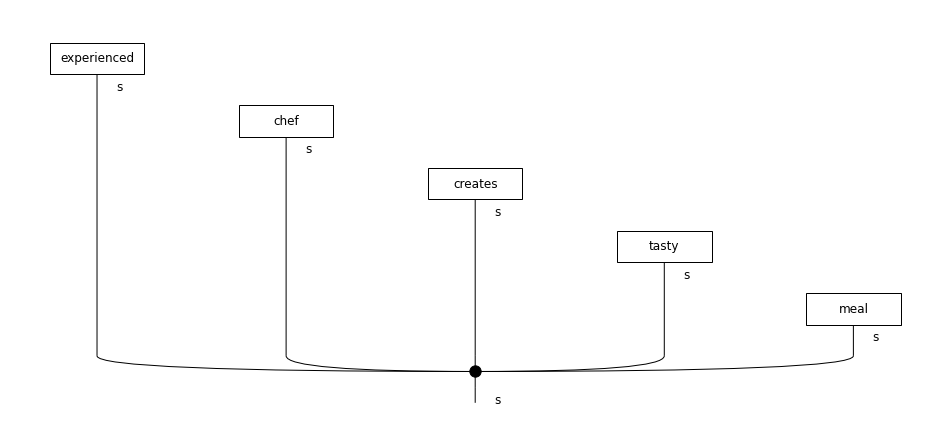

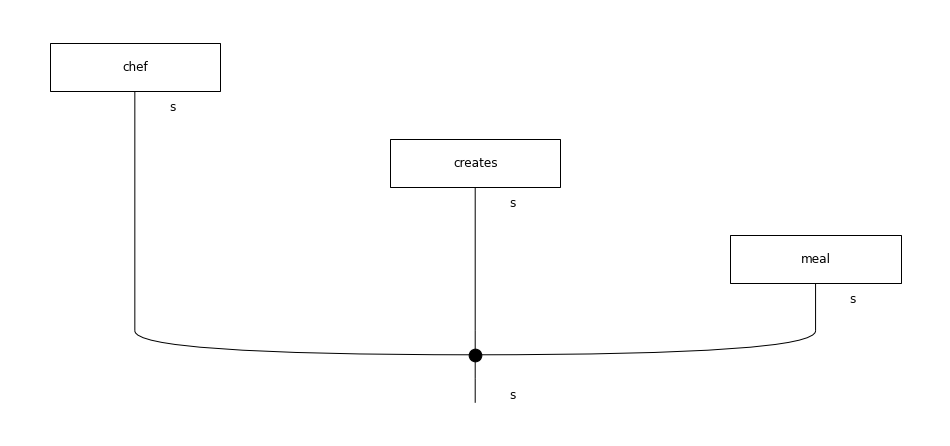

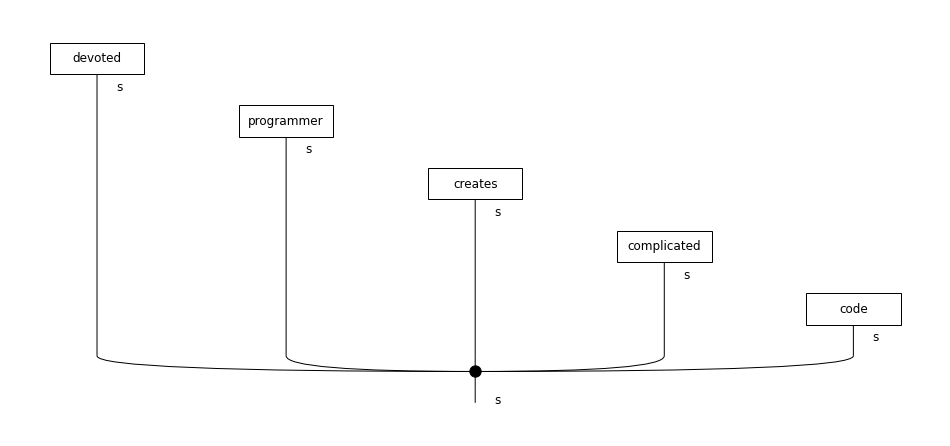

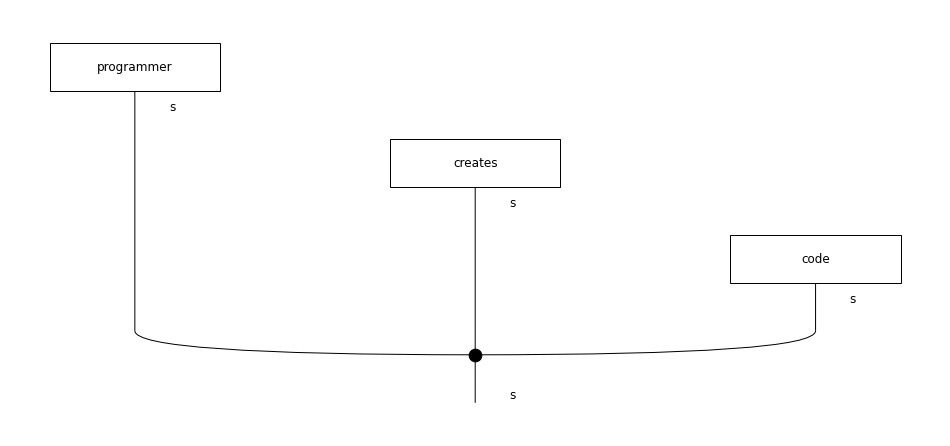

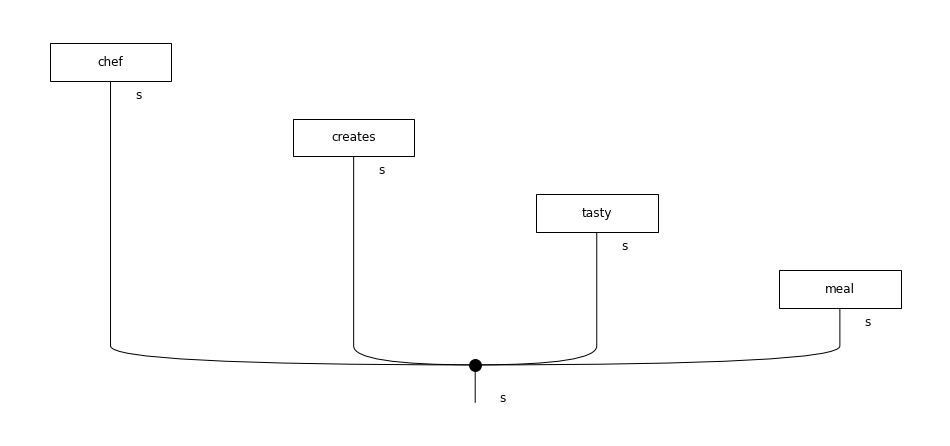

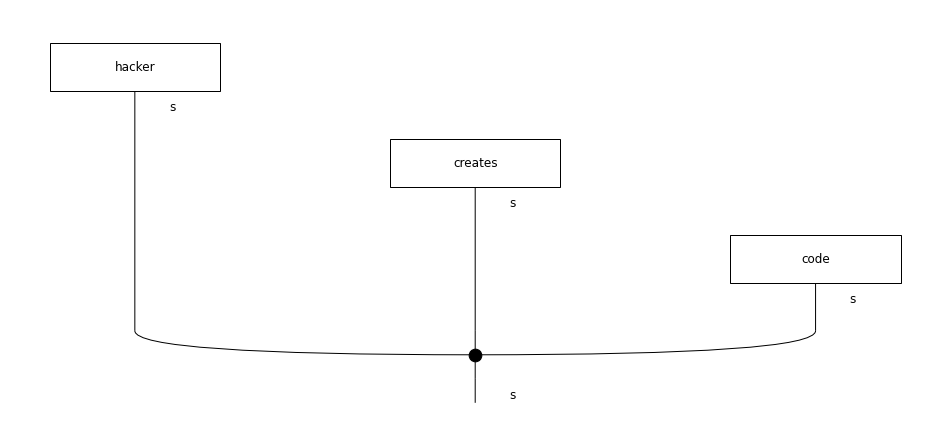

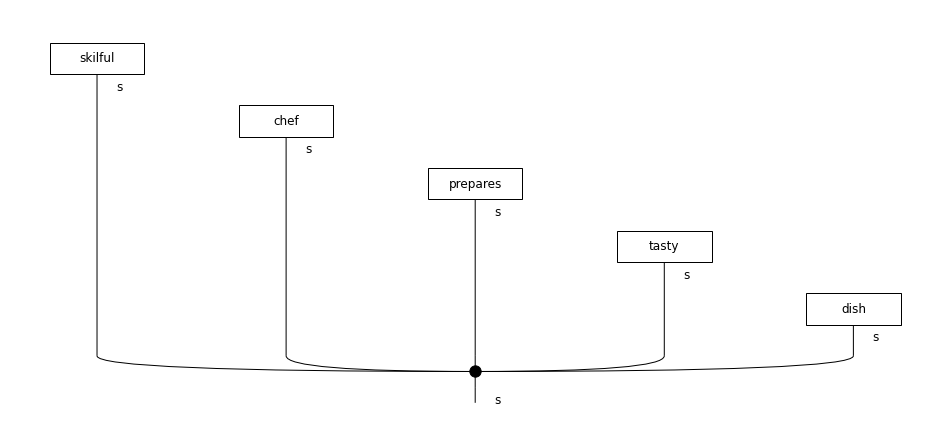

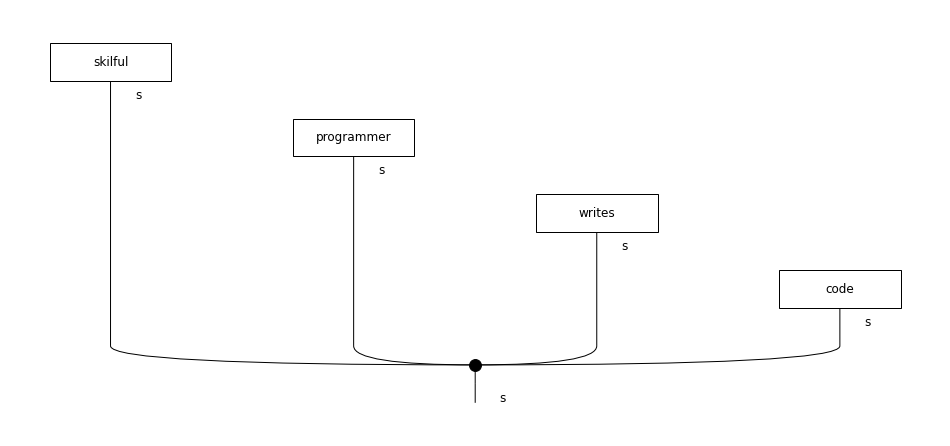

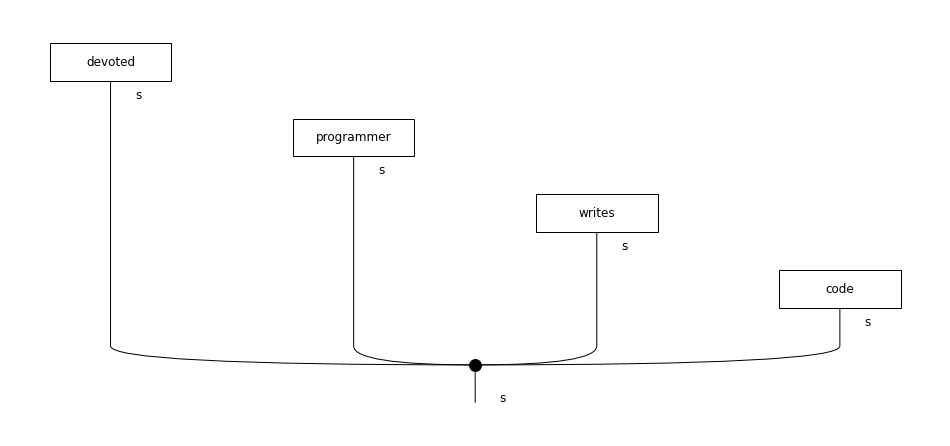

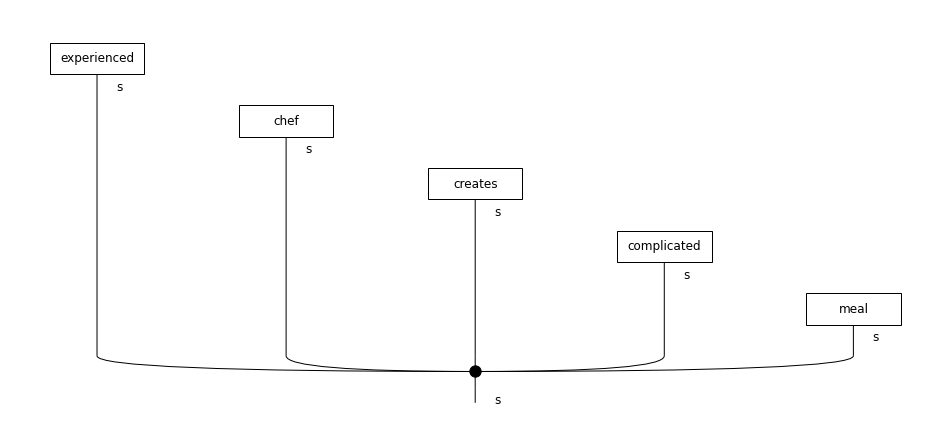

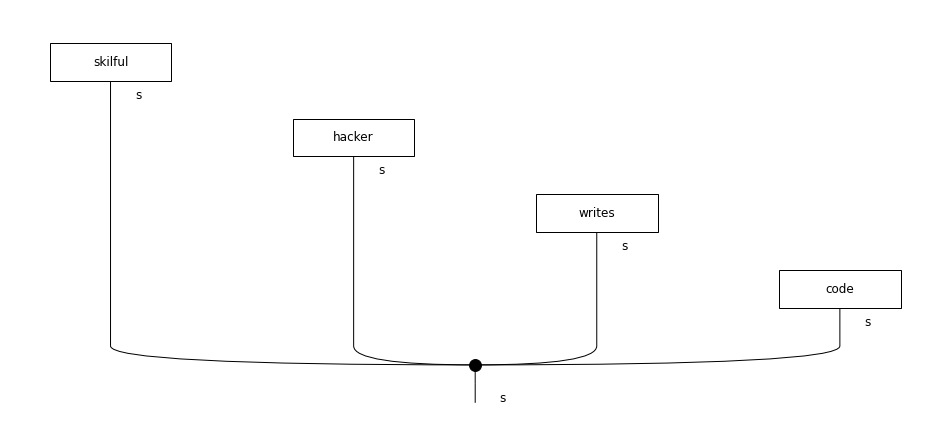

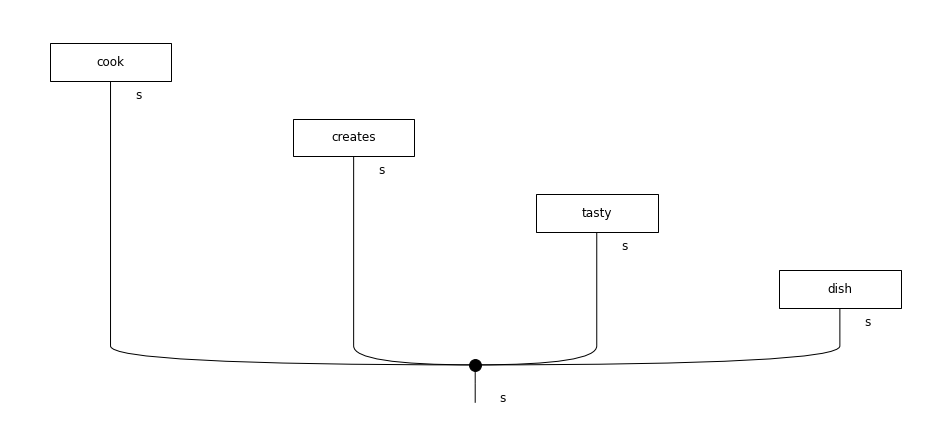

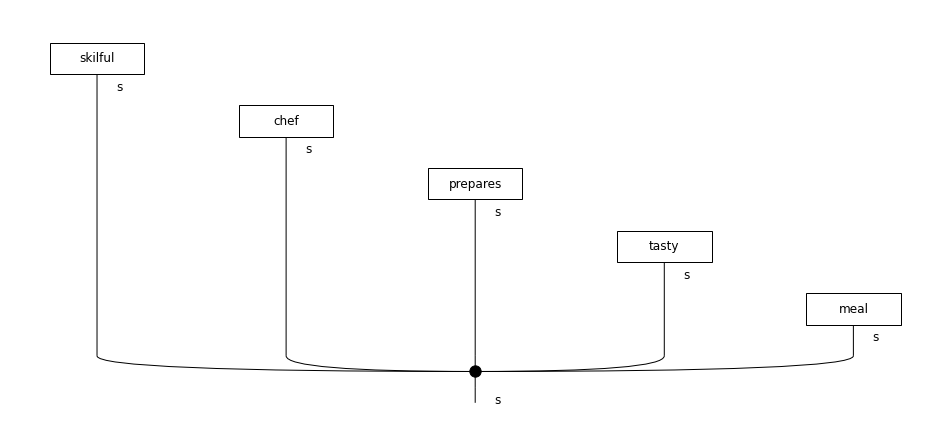

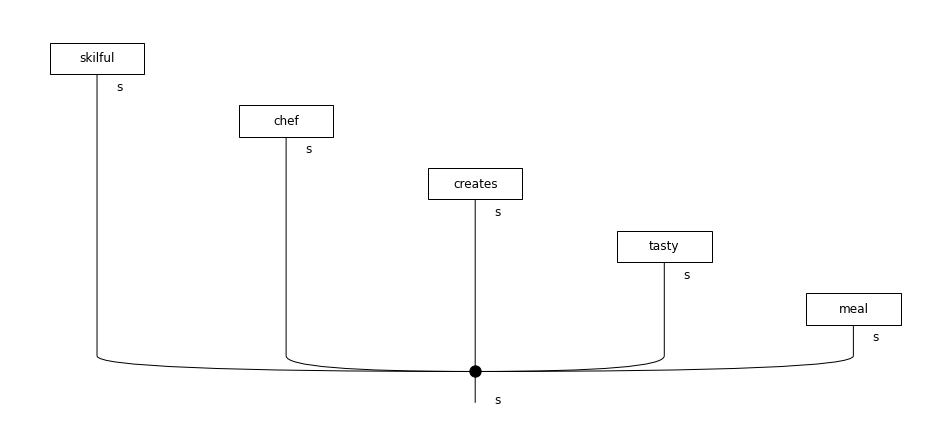

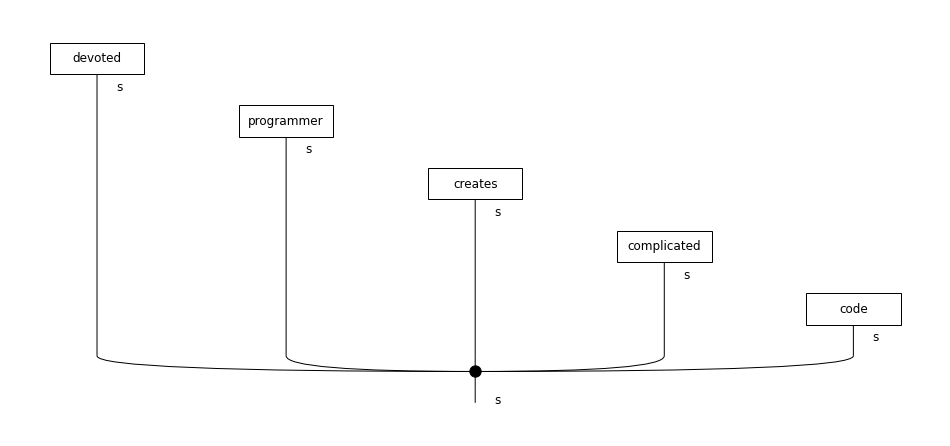

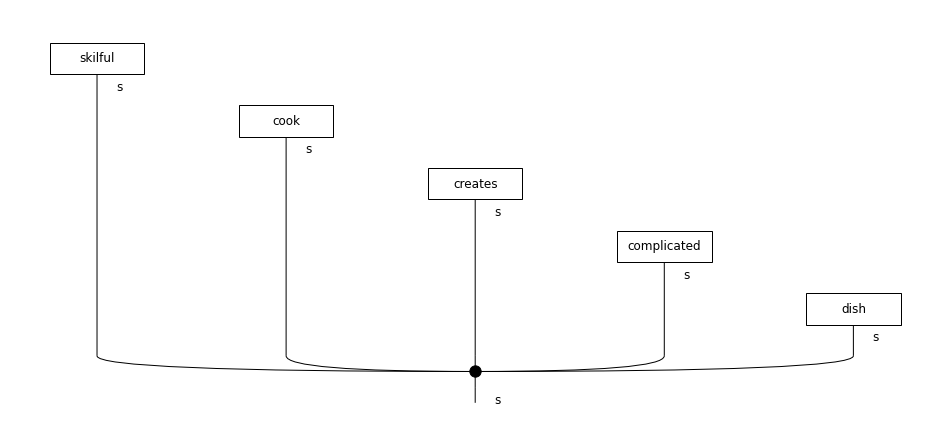

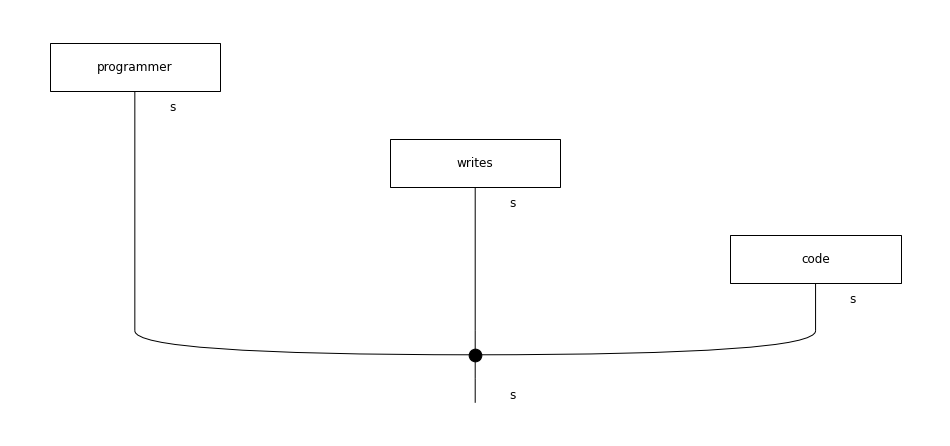

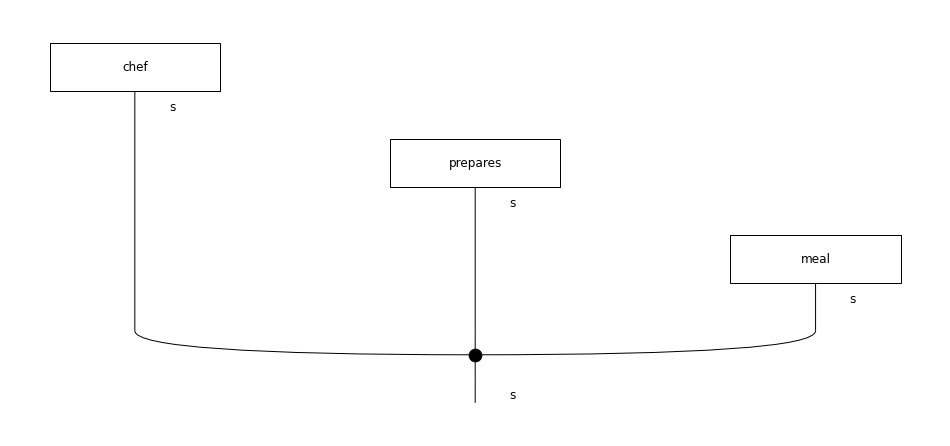

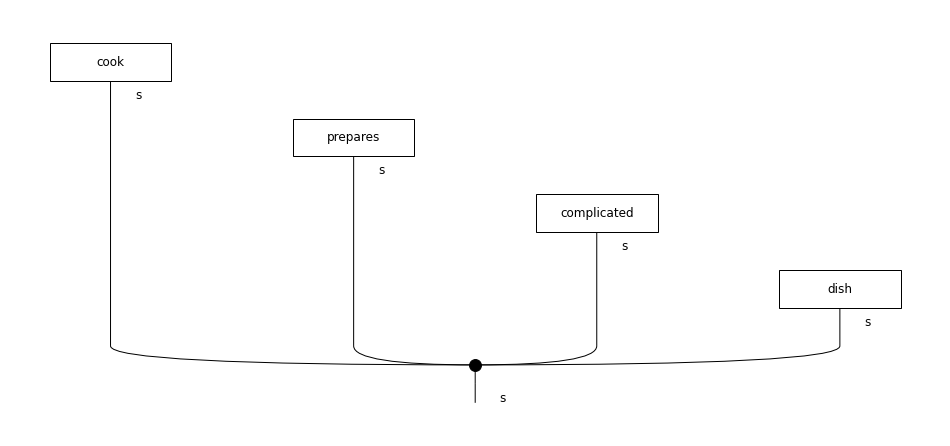

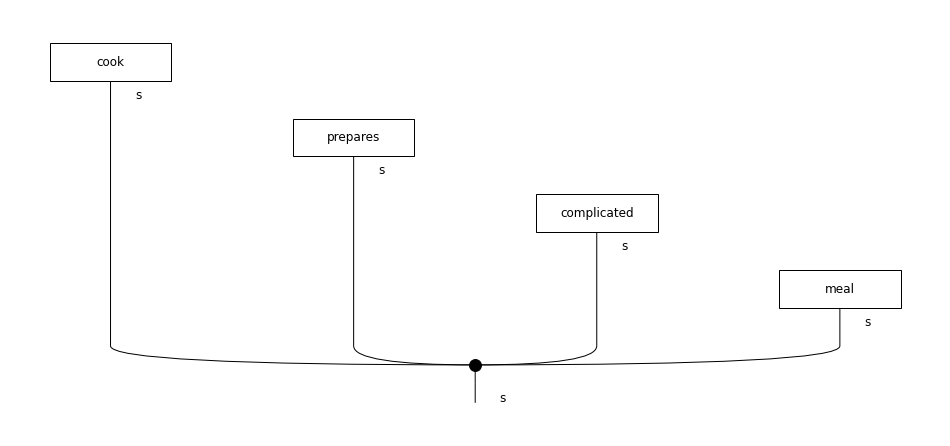

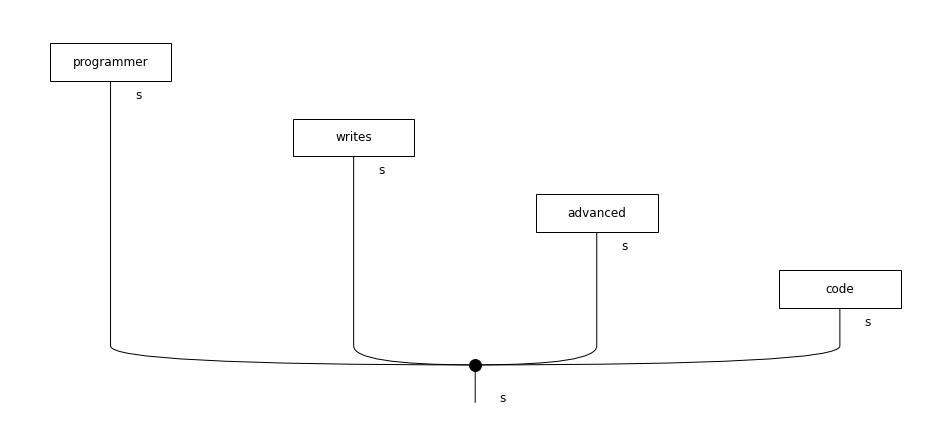

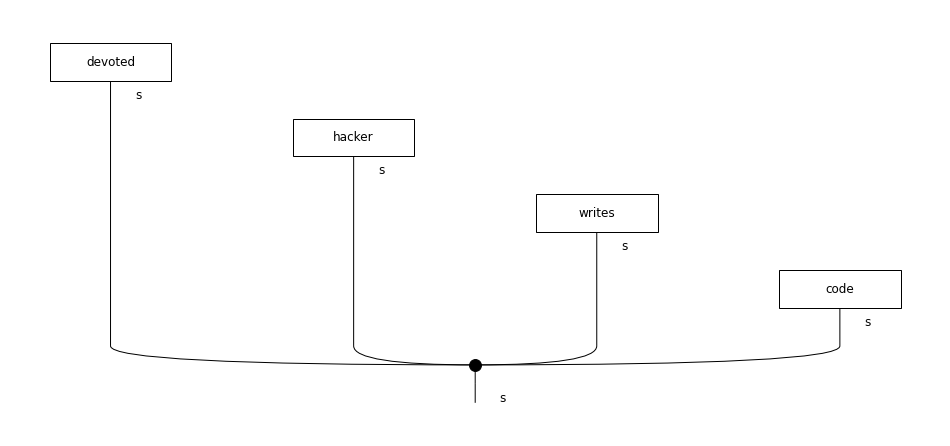

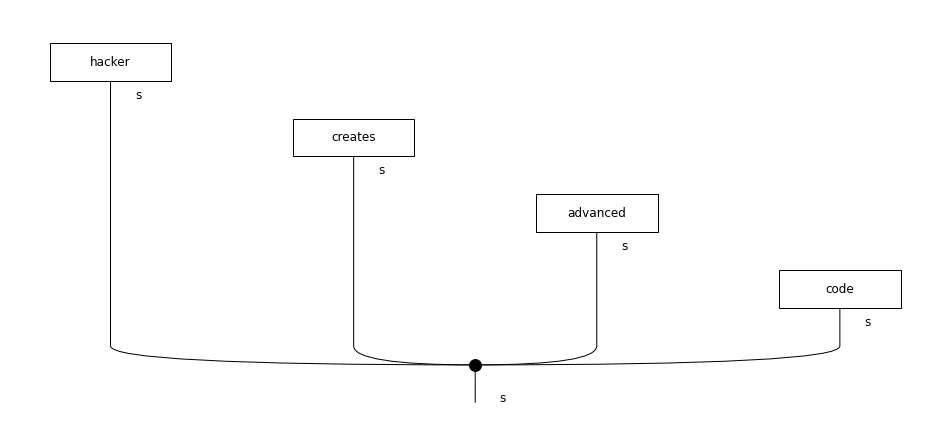

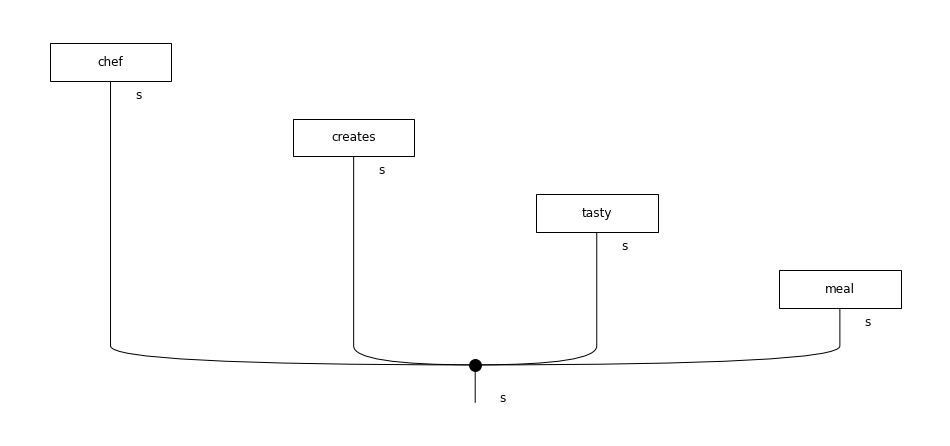

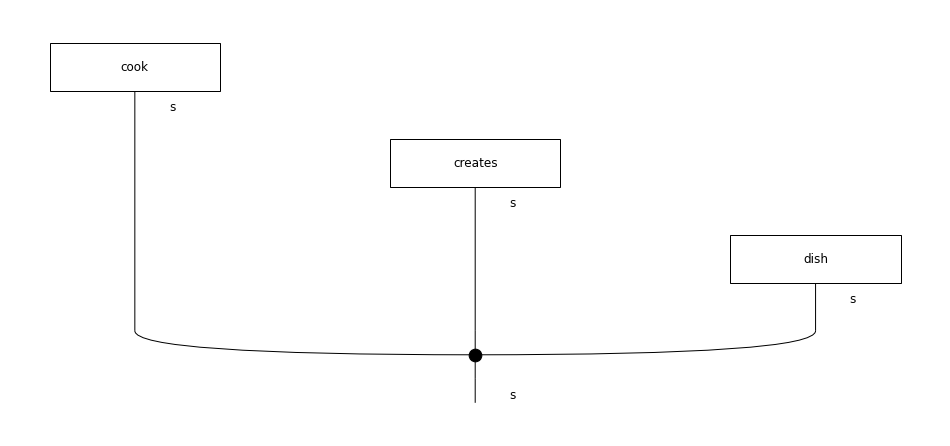

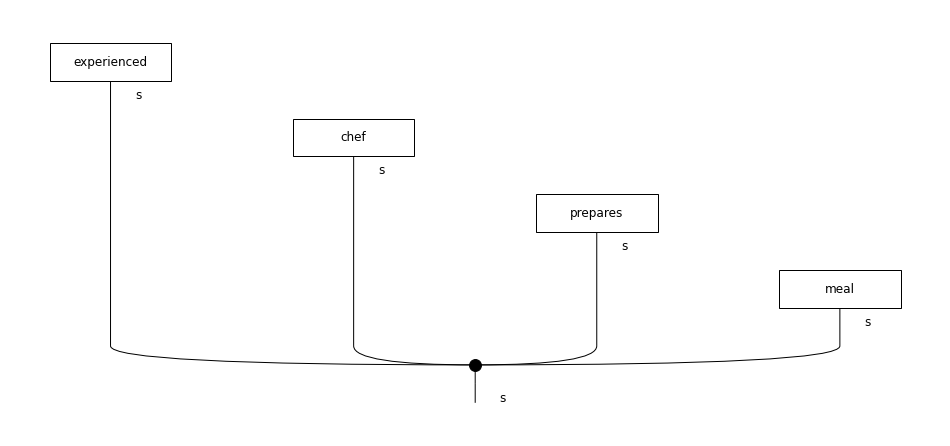

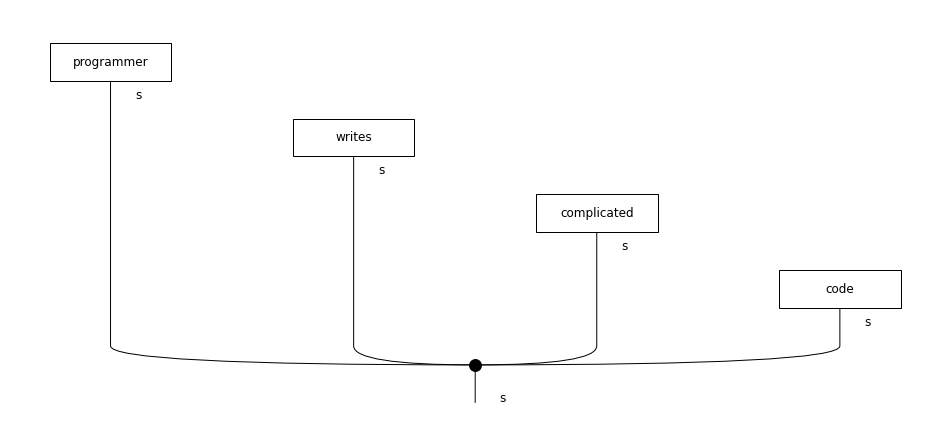

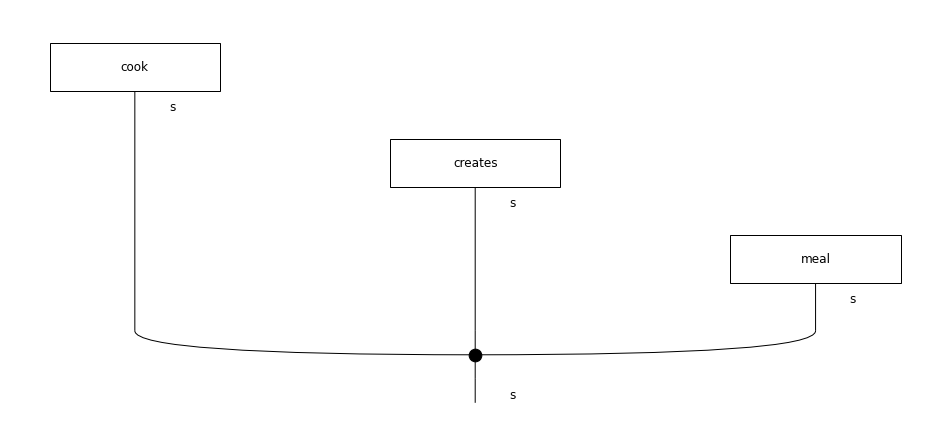

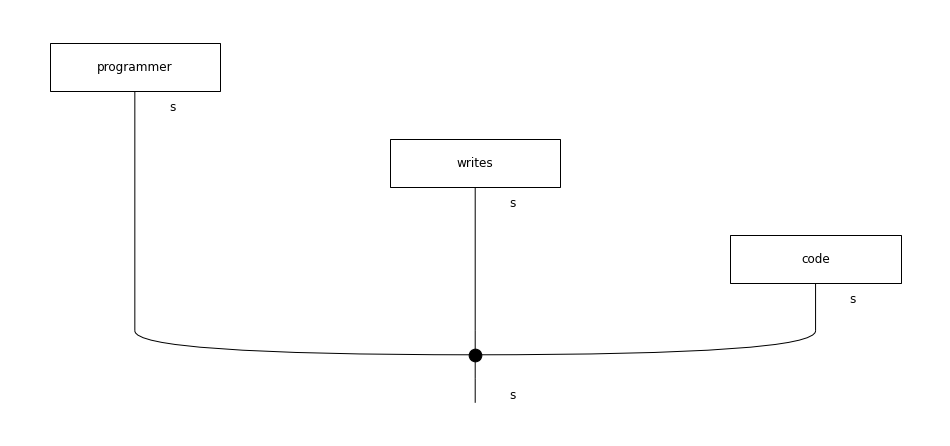

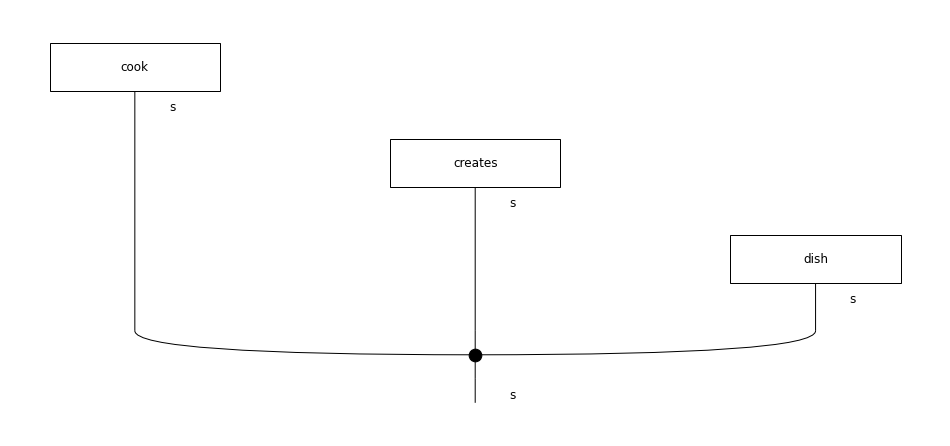

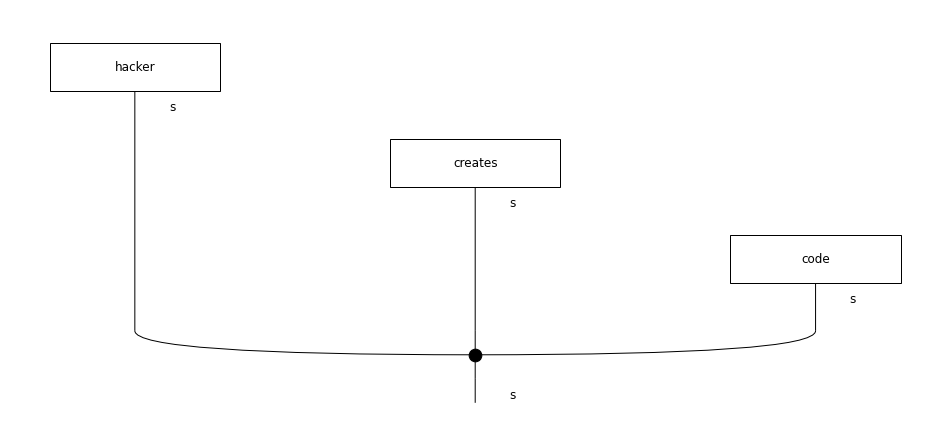

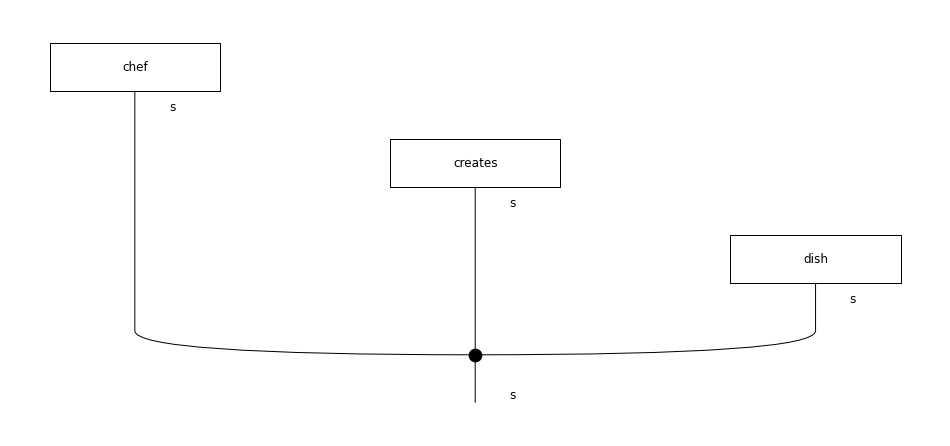

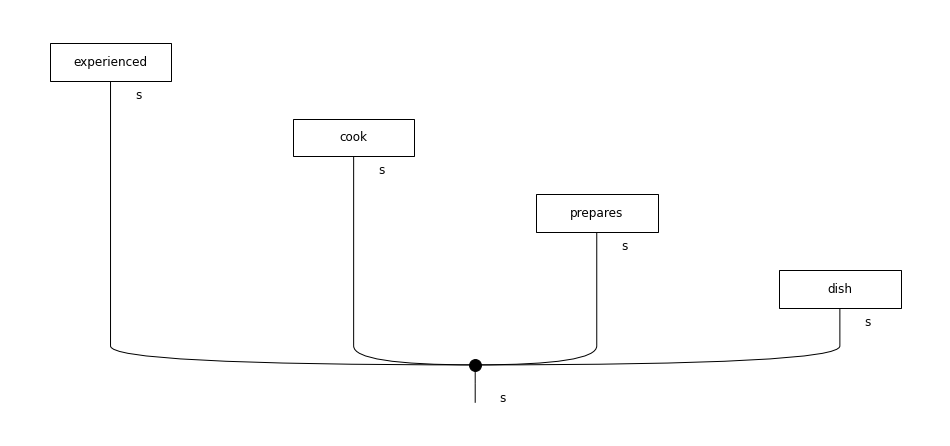

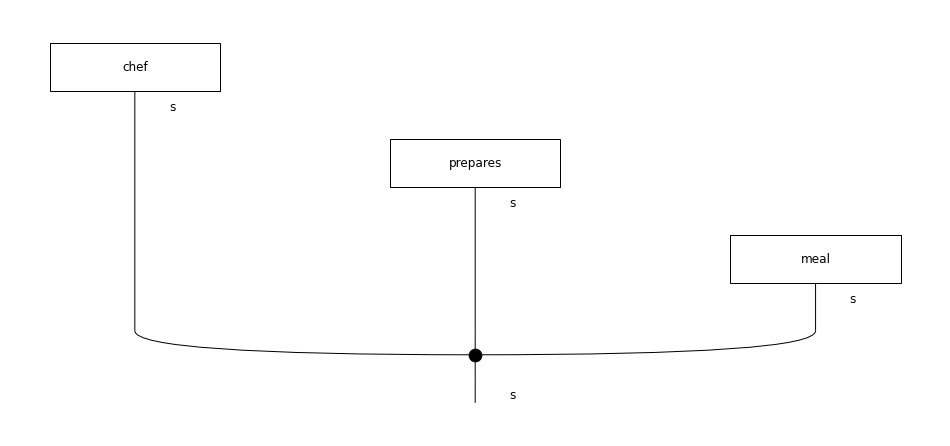

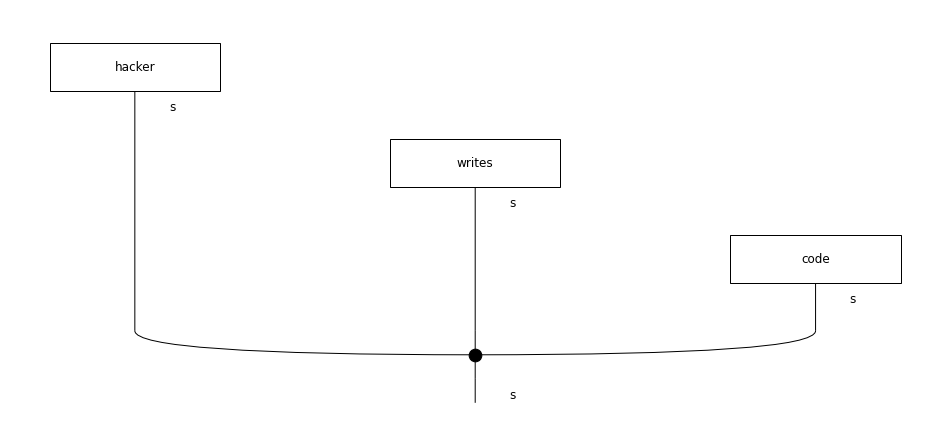

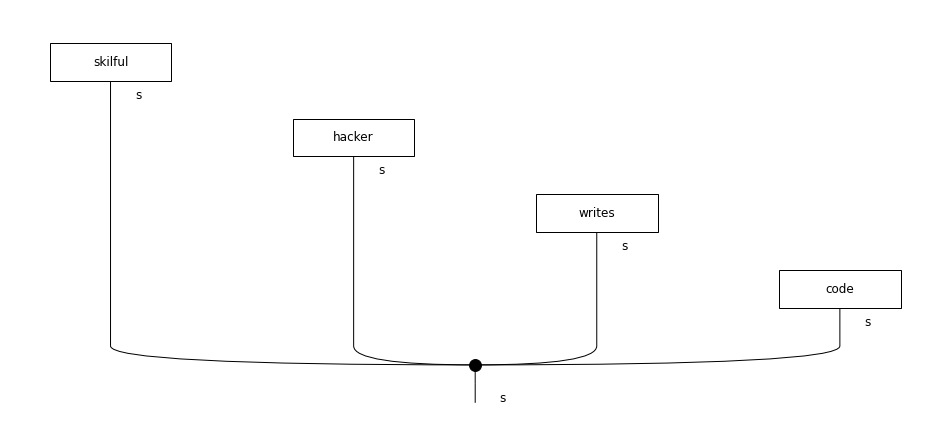

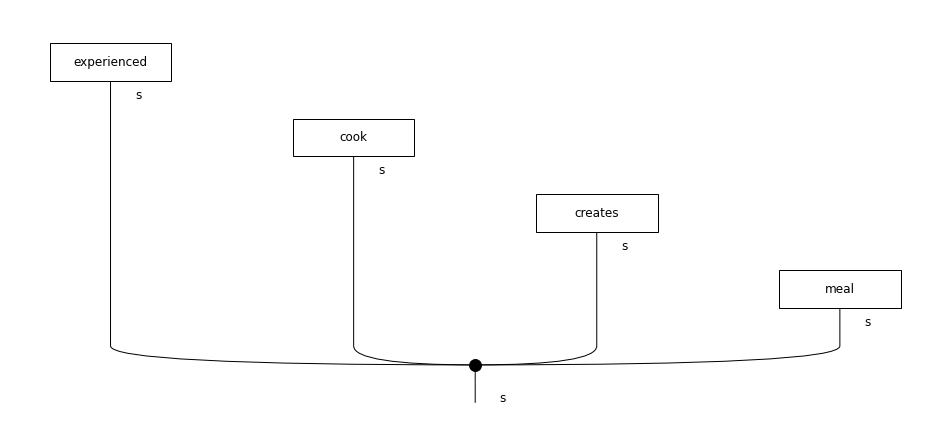

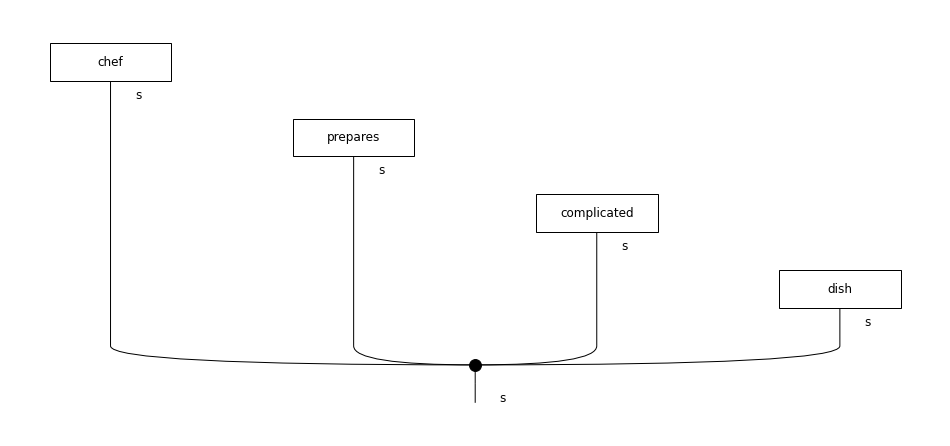

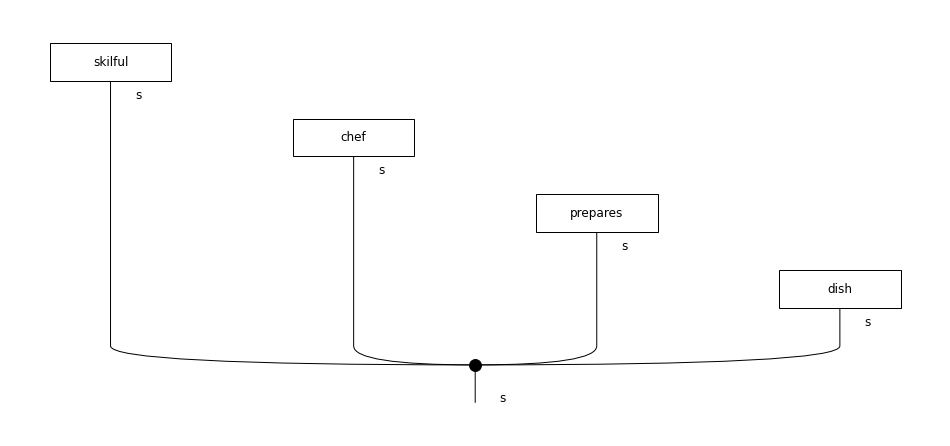

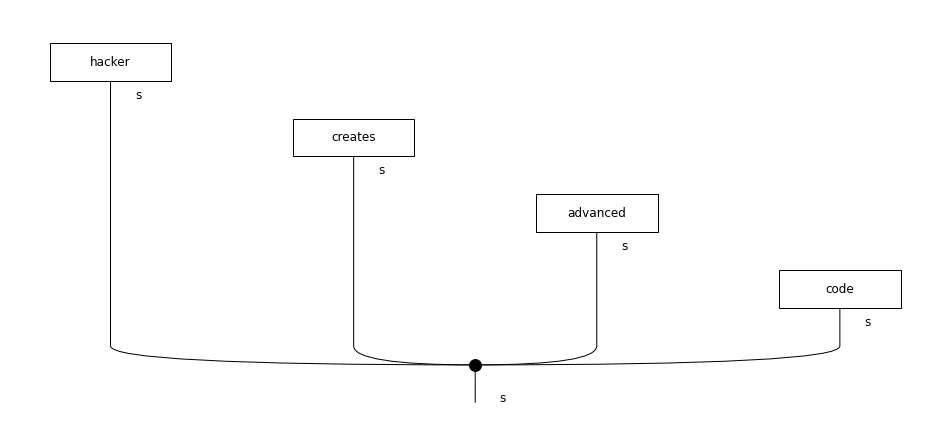

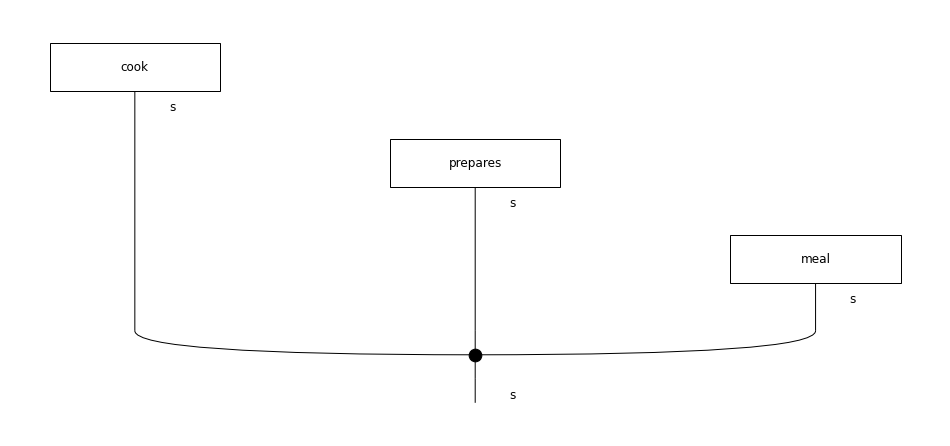

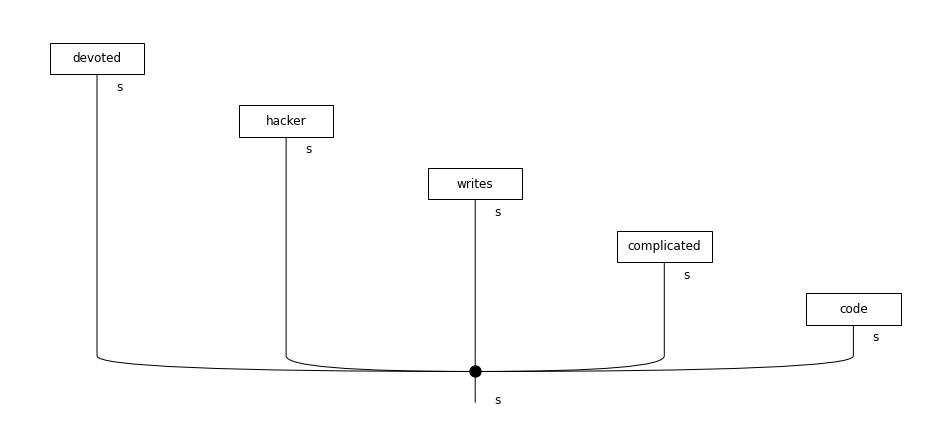

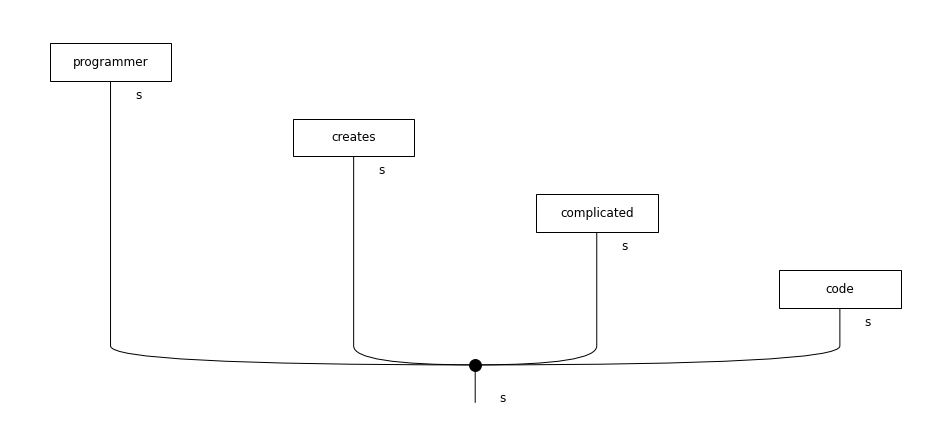

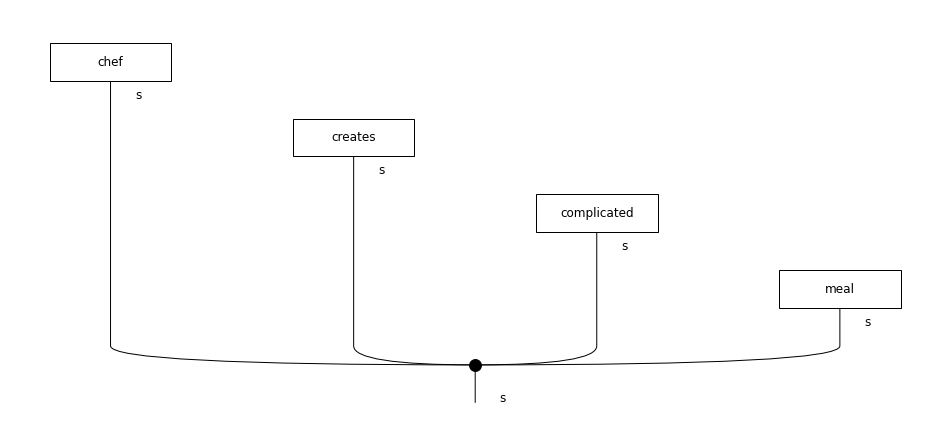

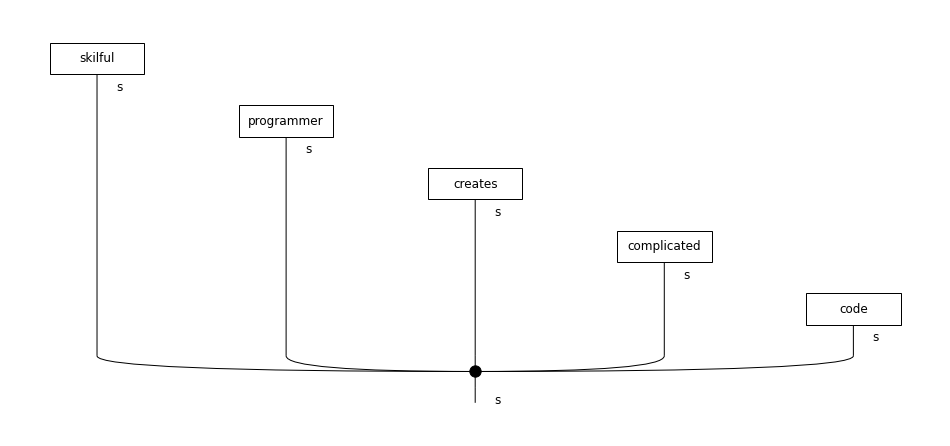

In [10]:
from lambeq import spiders_reader
for sentence in train_data1:
    # Create string diagrams based on spiders reader
    spiders_diagram = spiders_reader.sentence2diagram(sentence)

    # Not a pregroup diagram, we can't use grammar.draw()
    #spiders_diagram.draw(figsize=(13,6), fontsize=12)

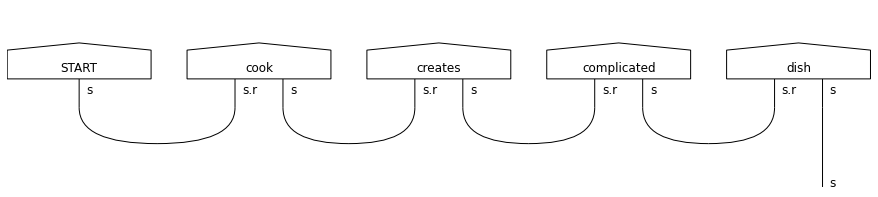

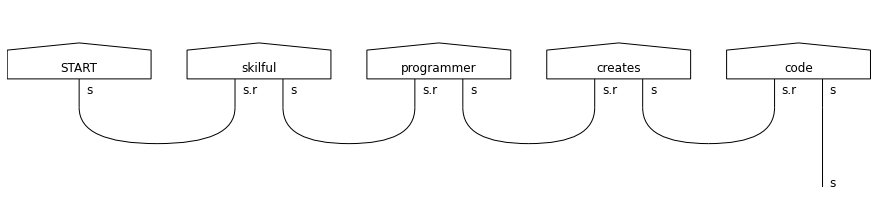

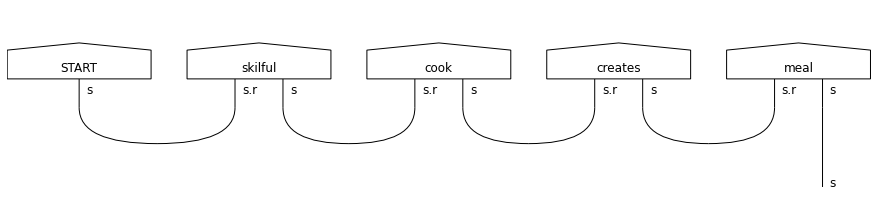

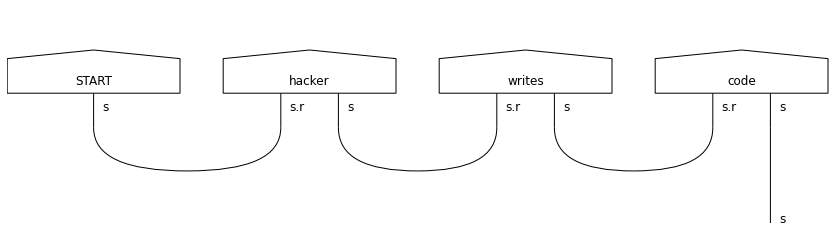

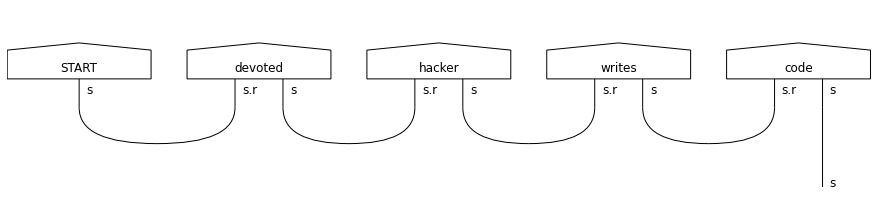

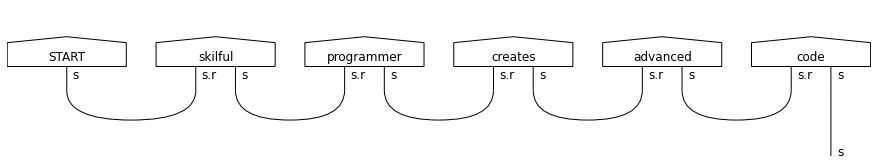

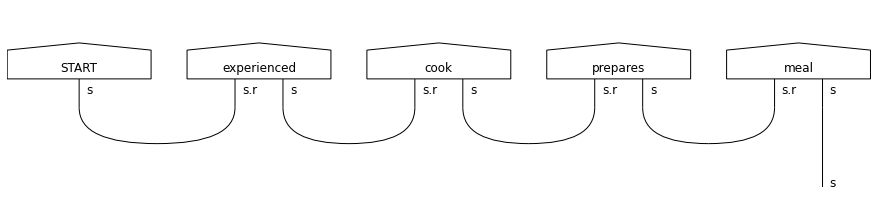

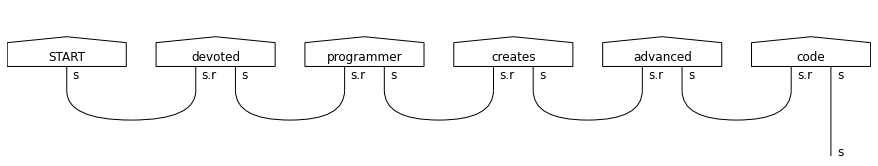

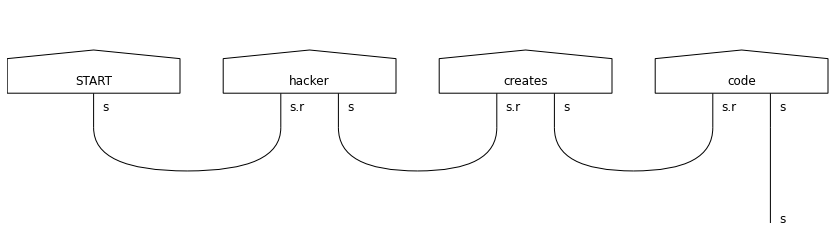

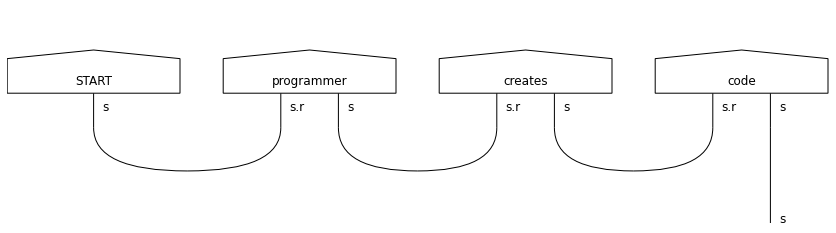

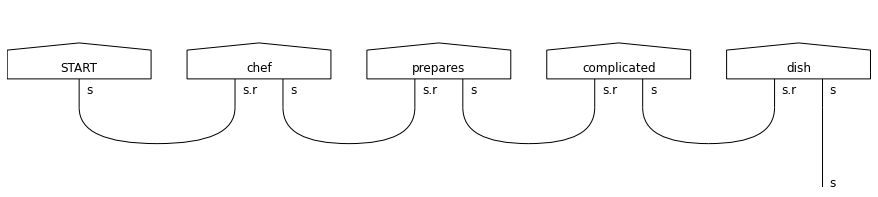

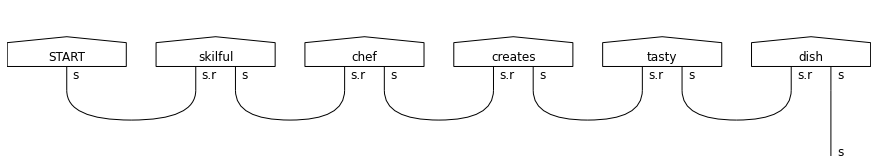

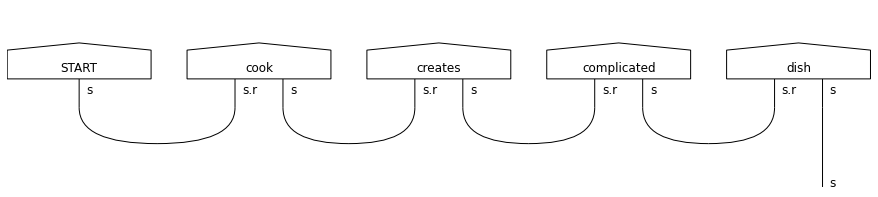

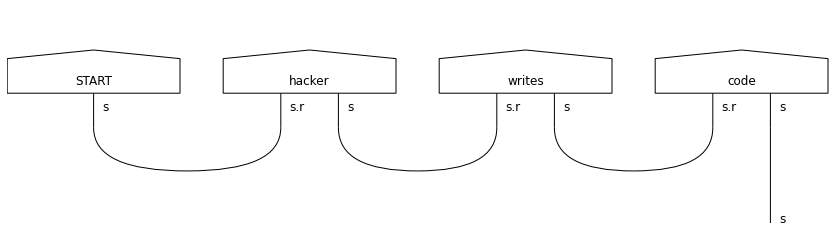

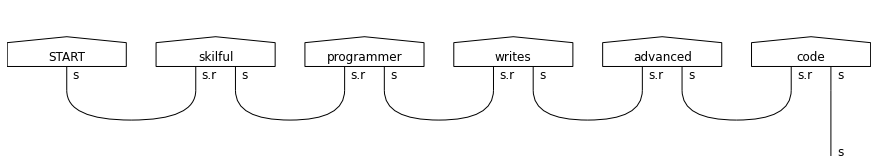

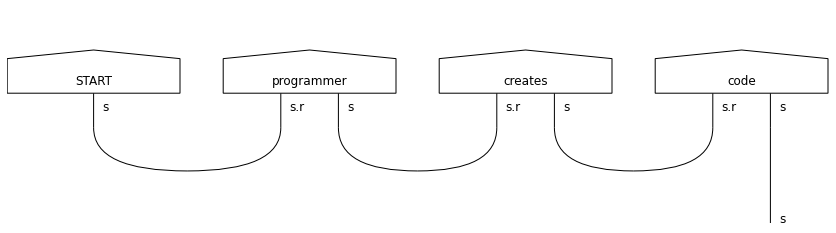

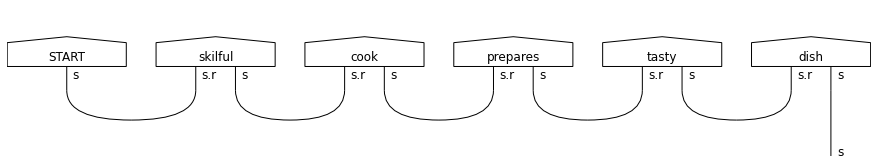

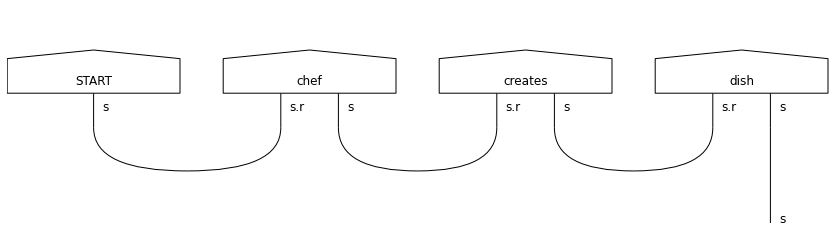

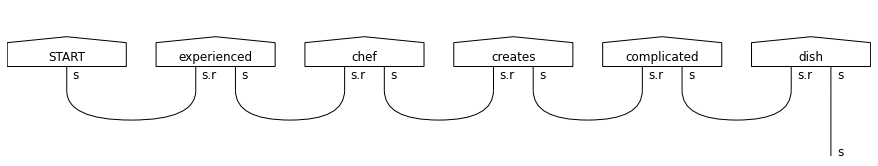

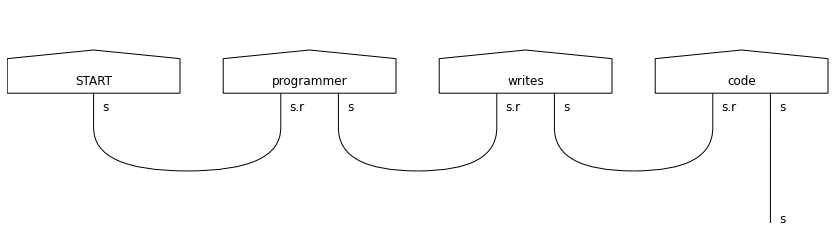

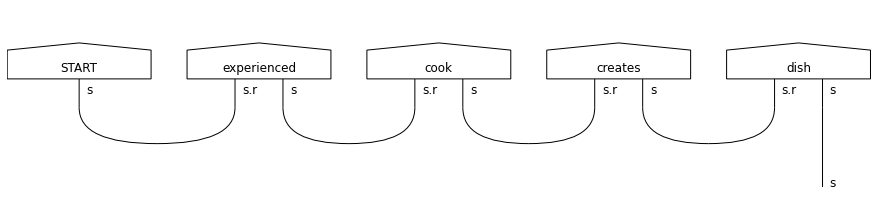

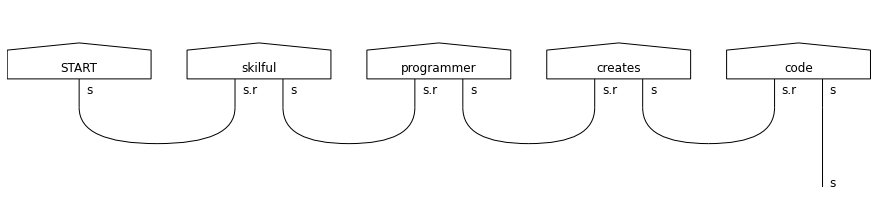

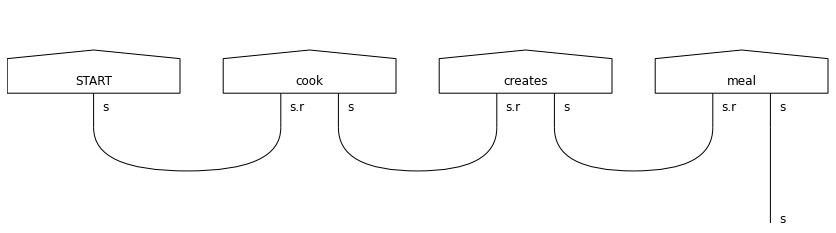

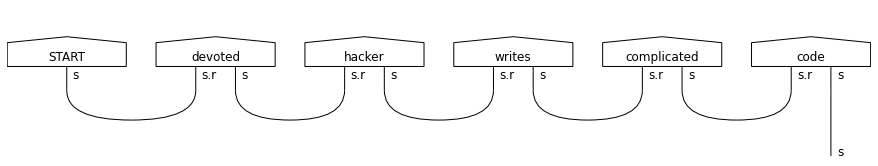

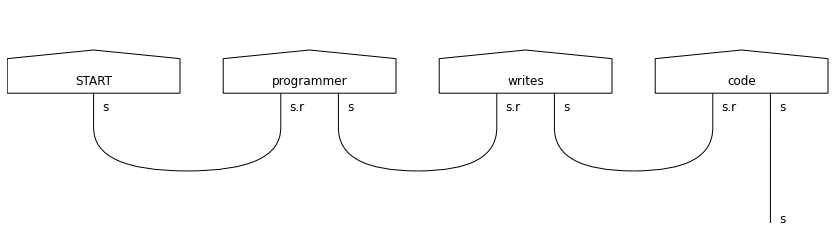

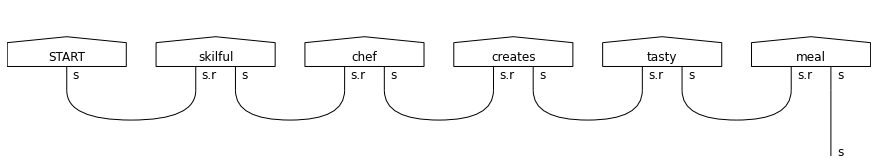

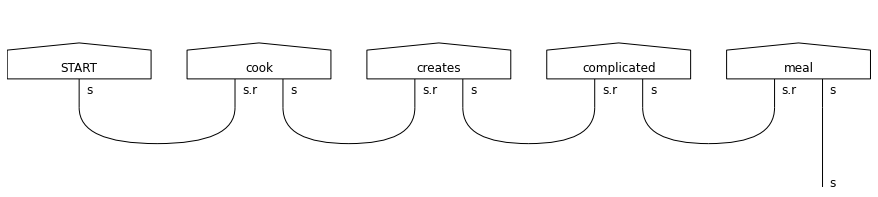

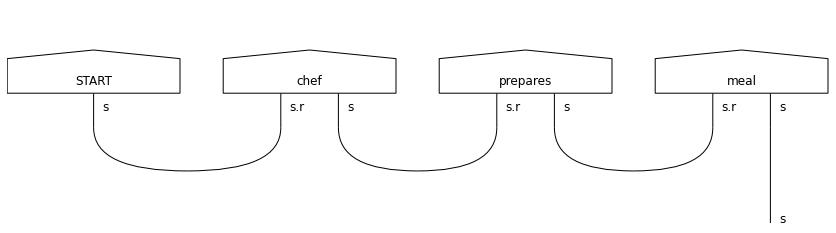

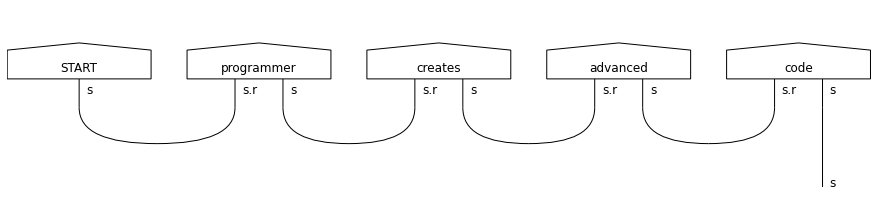

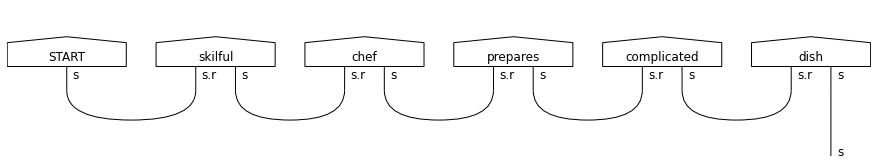

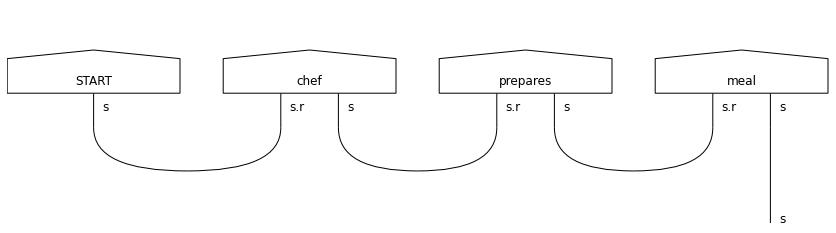

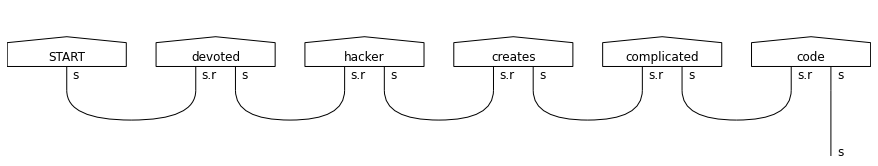

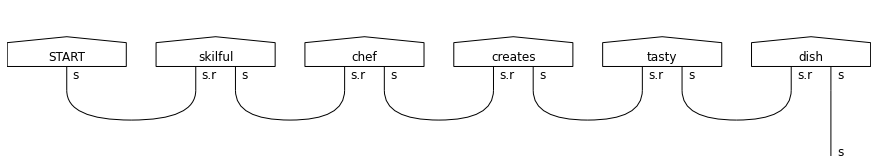

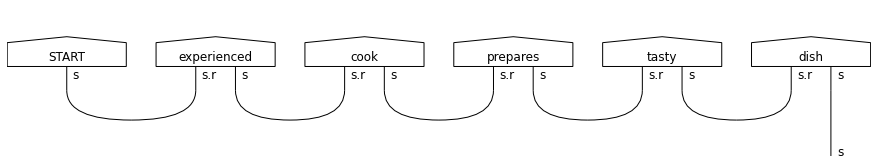

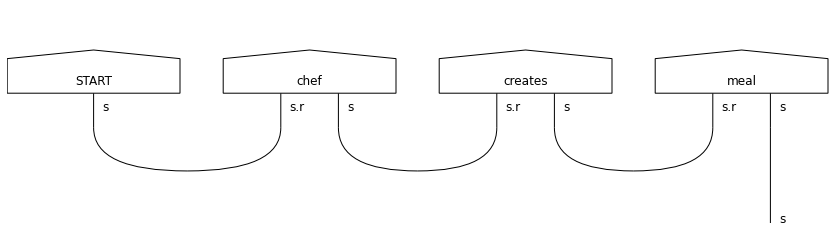

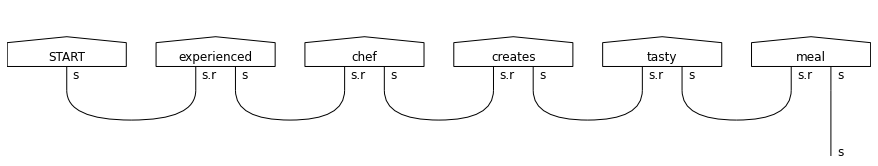

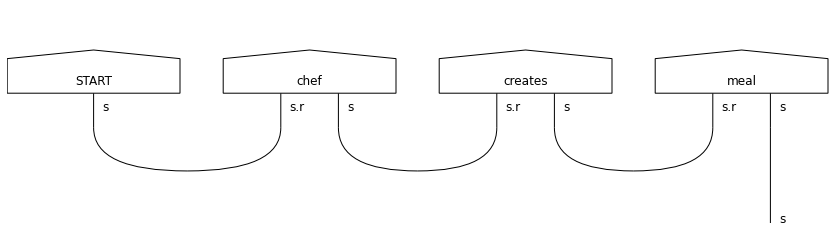

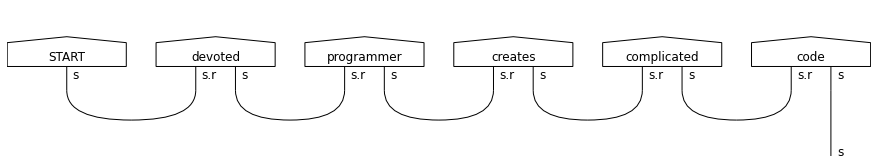

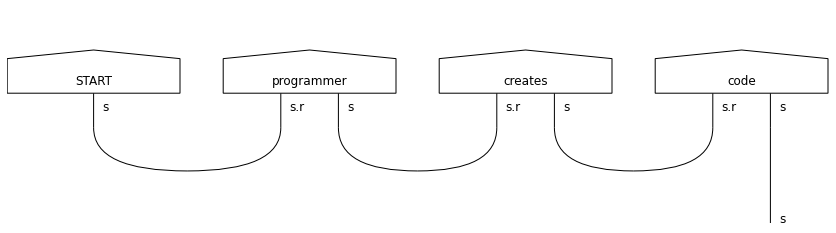

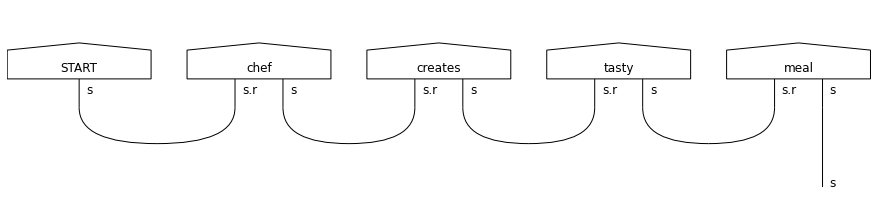

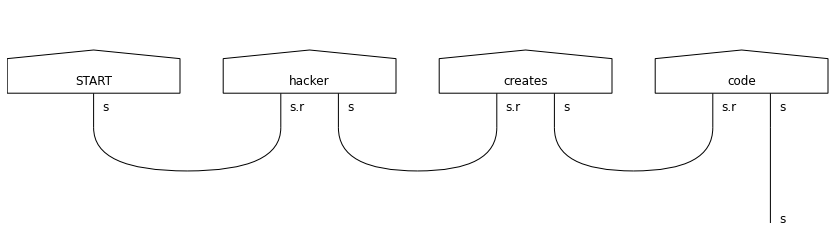

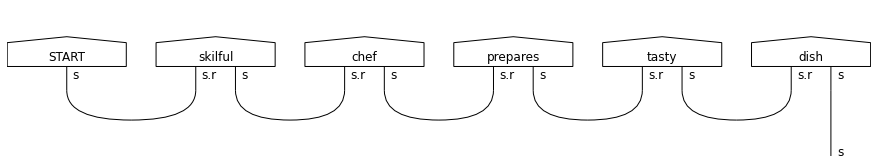

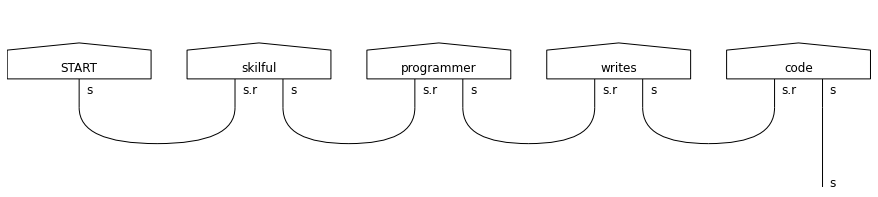

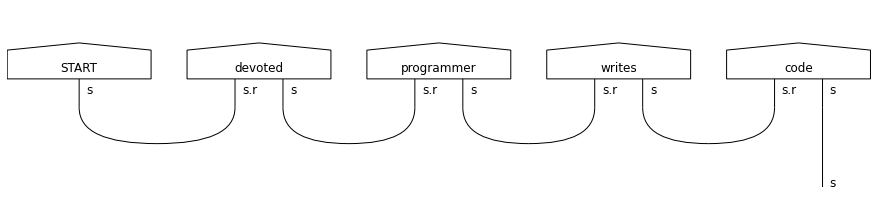

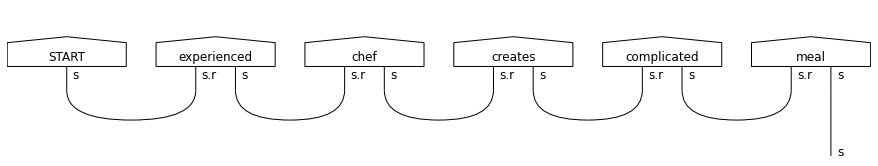

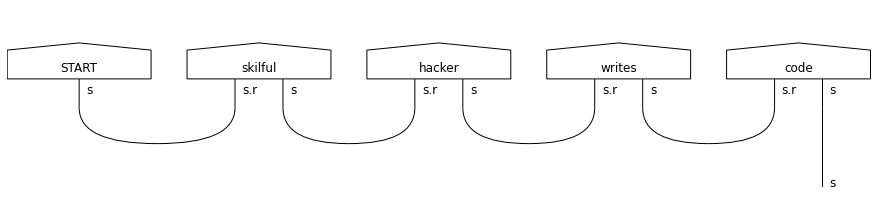

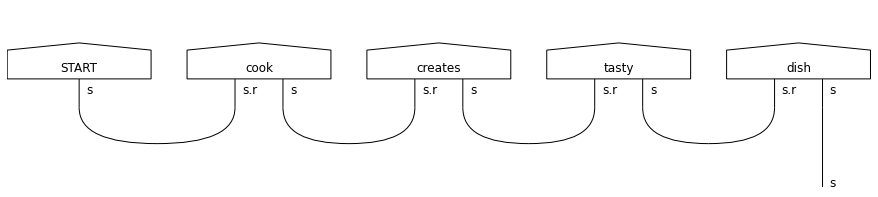

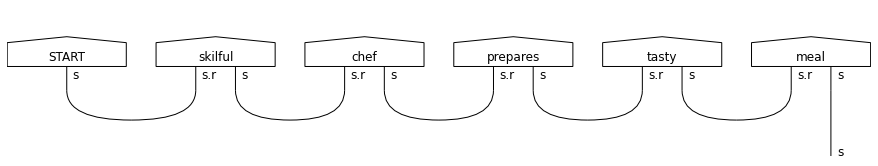

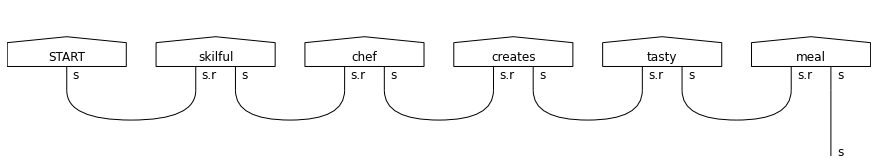

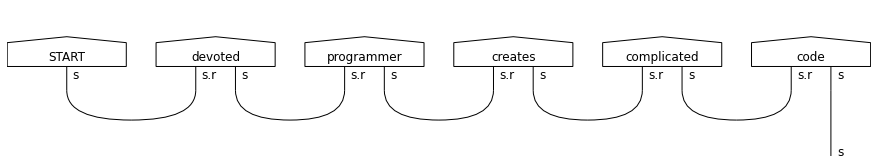

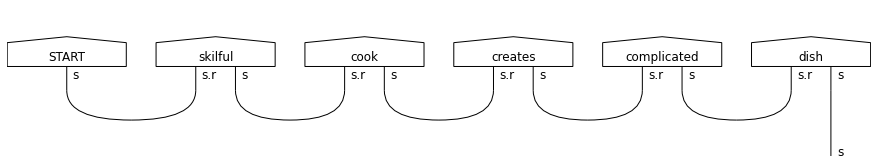

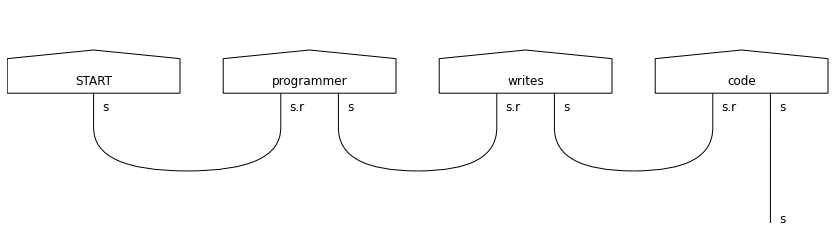

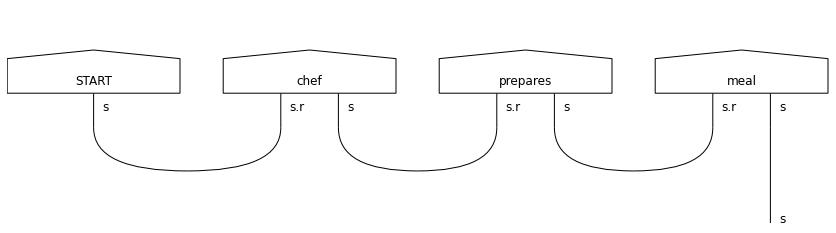

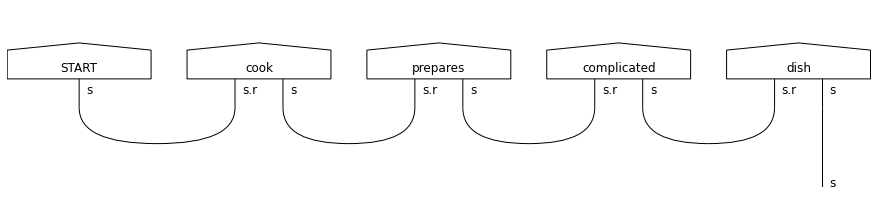

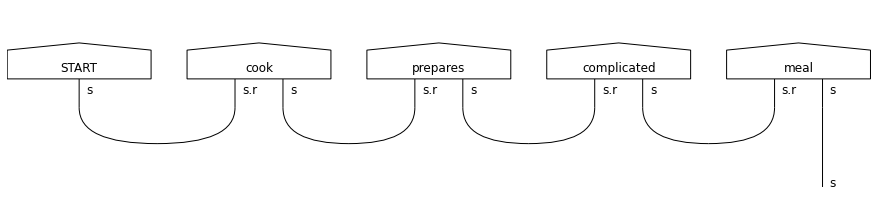

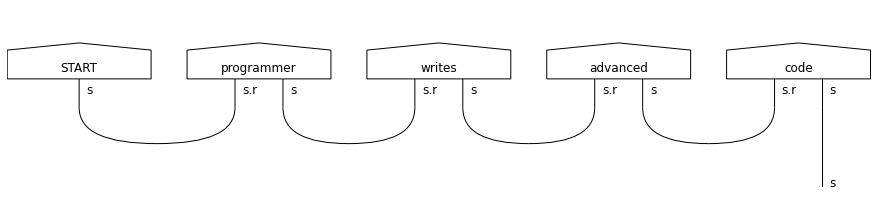

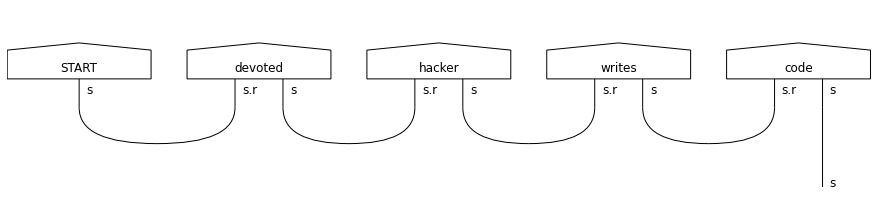

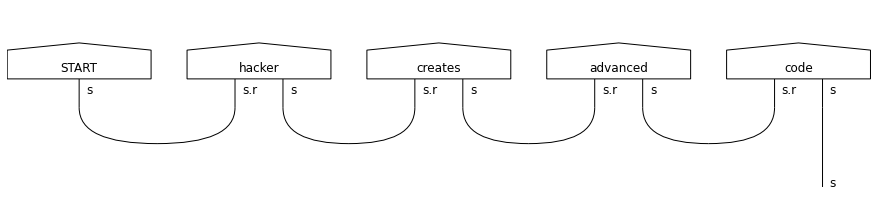

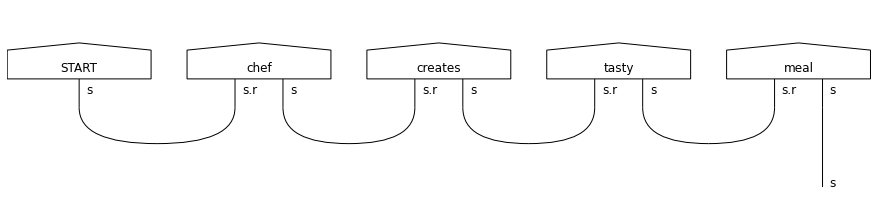

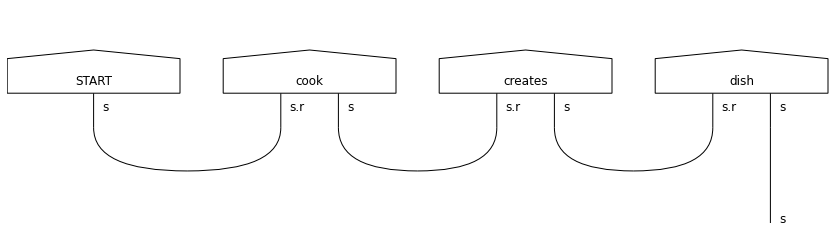

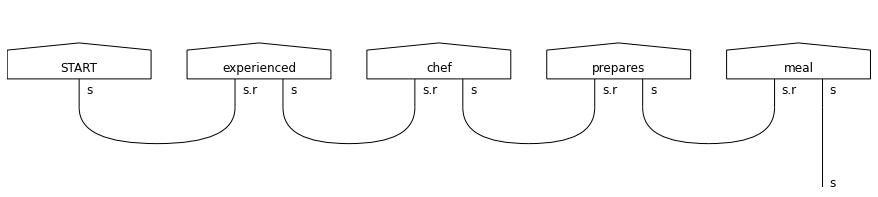

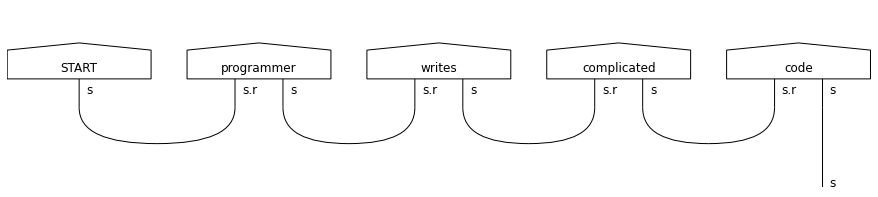

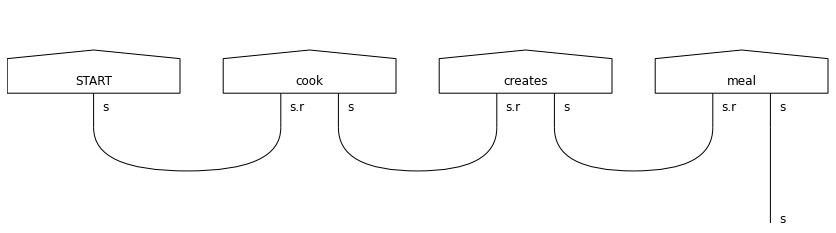

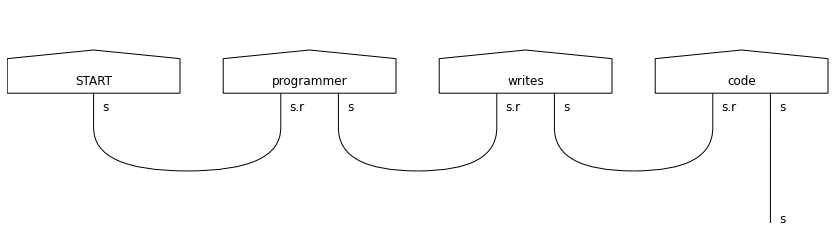

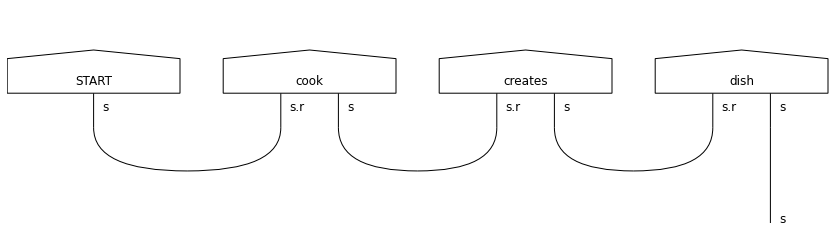

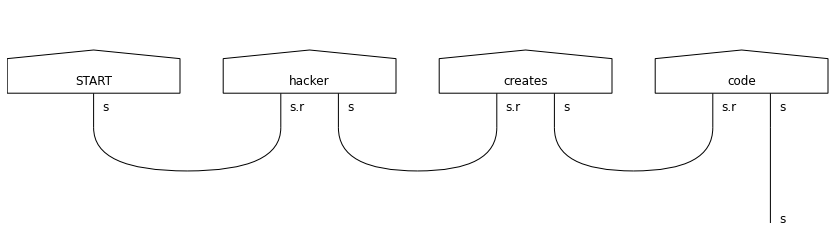

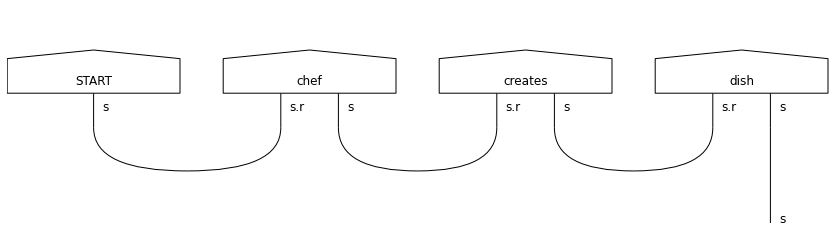

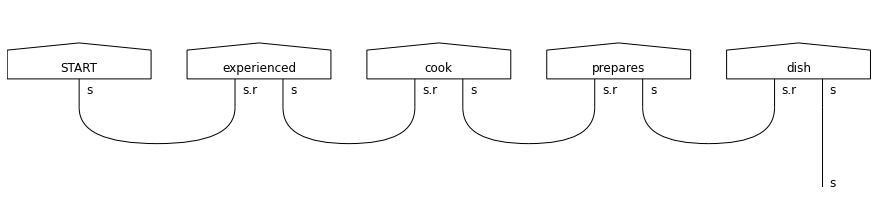

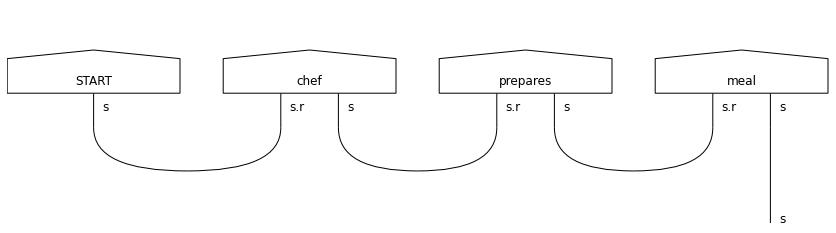

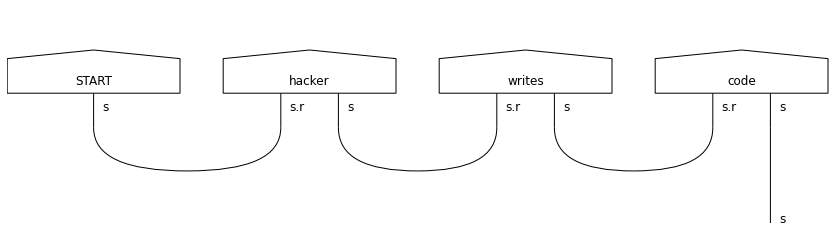

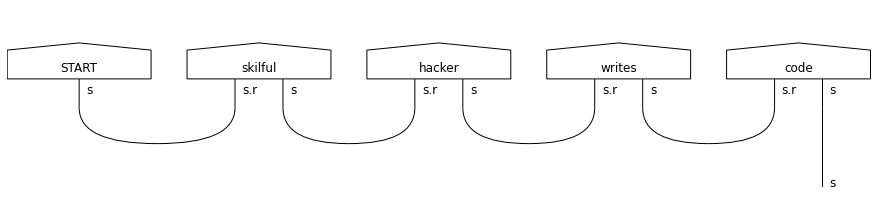

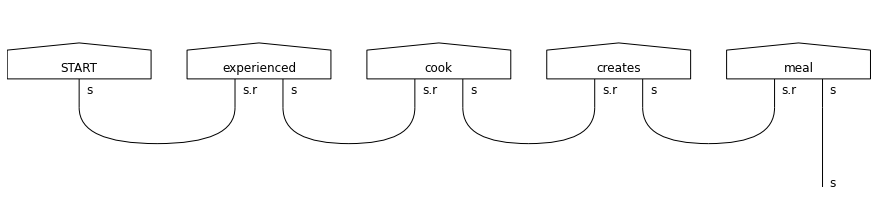

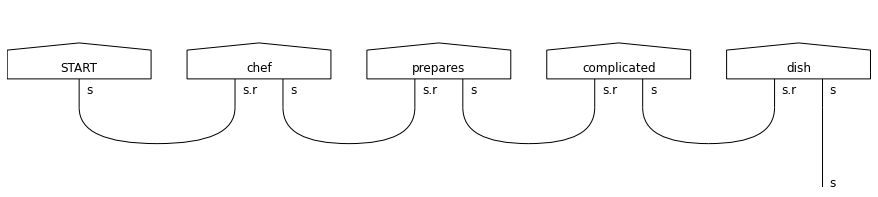

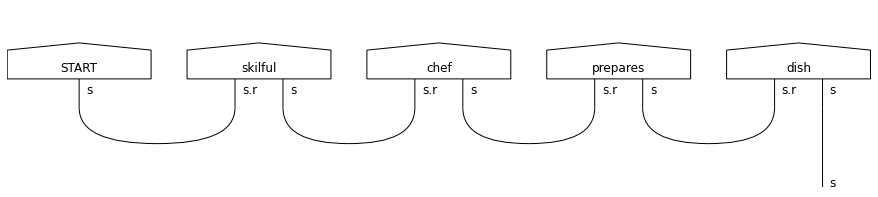

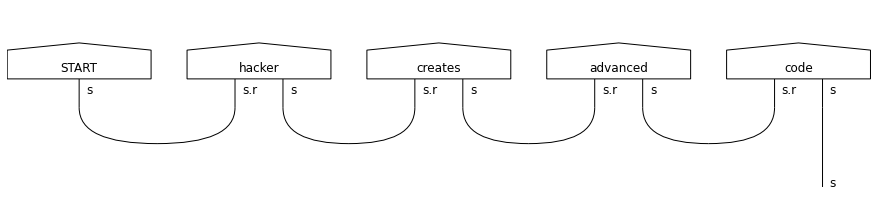

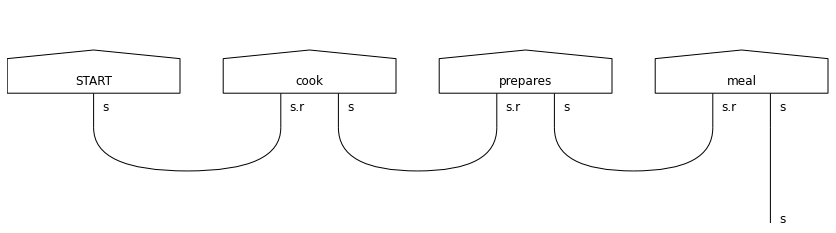

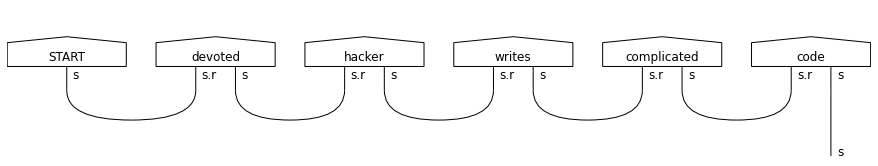

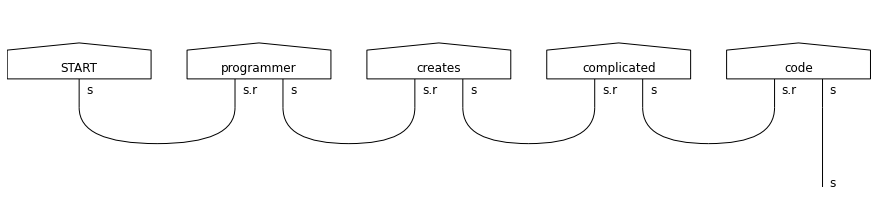

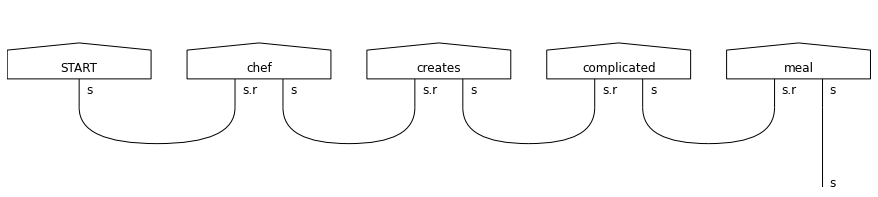

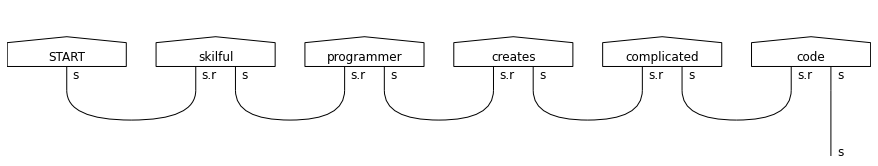

In [12]:
from lambeq import cups_reader
from discopy import grammar

for sentence in train_data1:
    # Create string diagrams based on cups reader
    cups_diagram = cups_reader.sentence2diagram(sentence)

    #grammar.draw(cups_diagram, figsize=(12,3), fontsize=12)

In [1]:
from lambeq import TreeReader, TreeReaderMode

reader = TreeReader(mode=TreeReaderMode.RULE_TYPE)

for sentence in train_data1:
    tree_diagram = reader.sentence2diagram(sentence)
    tree_diagram.draw(figsize=(12,5), fontsize=12)

/home/jovyan/.qbraid/environments/womanium_go14xk/pyenv/lib/python3.9/site-packages/lambeq/text2diagram/ccg_parser.py:24: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


NameError: name 'train_data1' is not defined